In [2]:
# from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from neurite_sandbox.tf.models import labels_to_labels
from neurite_sandbox.tf.utils.augment import add_outside_shapes
from neurite.tf.utils.augment import draw_perlin_full
from scipy.ndimage import distance_transform_edt
import scipy.ndimage as ndi
import tensorflow.keras.layers as KL
import voxelmorph as vxm


import argparse
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pathlib
# import surfa as sf
import re
import json
from keras import backend as K
import param_3d
import data
import model_3d
from data_3d import *
import scipy.ndimage as ndimage

import nibabel as nib
from tqdm import tqdm
from tensorflow.keras.layers import Lambda

from utils import *
from help import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Check devices
print("Available devices:", tf.config.list_physical_devices())
k=6
def get_pig_model():
    epsilon =1e-7
    min_max_norm = Lambda(lambda x: (x - K.min(x)) / (K.max(x) - K.min(x)+ epsilon) * (1.0) )
    
    print("model is loading")
    en = [16 ,16 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64 ,64]
    de = [64 ,64 ,64 ,64, 64 ,64 ,64, 64, 64, 16 ,16 ,2]
    input_img = Input(shape=(param_3d.img_size_192,param_3d.img_size_192,param_3d.img_size_192, 1))
    unet_model = vxm.networks.Unet(inshape=(param_3d.img_size_192,param_3d.img_size_192,param_3d.img_size_192, 1), nb_features=(en, de),
                       nb_conv_per_level=2,
                       final_activation_function='softmax')
        
    latest_weight = max(glob.glob(os.path.join("models_gmm_"+str(k), 'weights_epoch_*.h5')), key=os.path.getctime, default=None)
    print(latest_weight)
    generated_img_norm = min_max_norm(input_img)
    segmentation = unet_model(generated_img_norm)
    combined_model = Model(inputs=input_img, outputs=segmentation)
    combined_model.load_weights(latest_weight)
    return combined_model

/cbica/home/dadashkj/neurite/neurite/__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()
/cbica/home/dadashkj/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Issue loading cv2


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2025-02-02 17:26:37.852830: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-02-02 17:26:37.852917: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: cubic-login3
2025-02-02 17:26:37.852935: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: cubic-login3
2025-02-02 17:26:37.853046: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.73.1
2025-02-02 17:26:37.853126: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.73.1
2025-02-02 17:26:37.853142: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.73.1


In [3]:
validation_folder_path = "/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask"
subfolders = [f.name for f in os.scandir(validation_folder_path) if f.is_dir()]
combined_model = get_pig_model()

model is loading
models_gmm_6/weights_epoch_220.h5


/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-081_1month/JAW-081_1month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


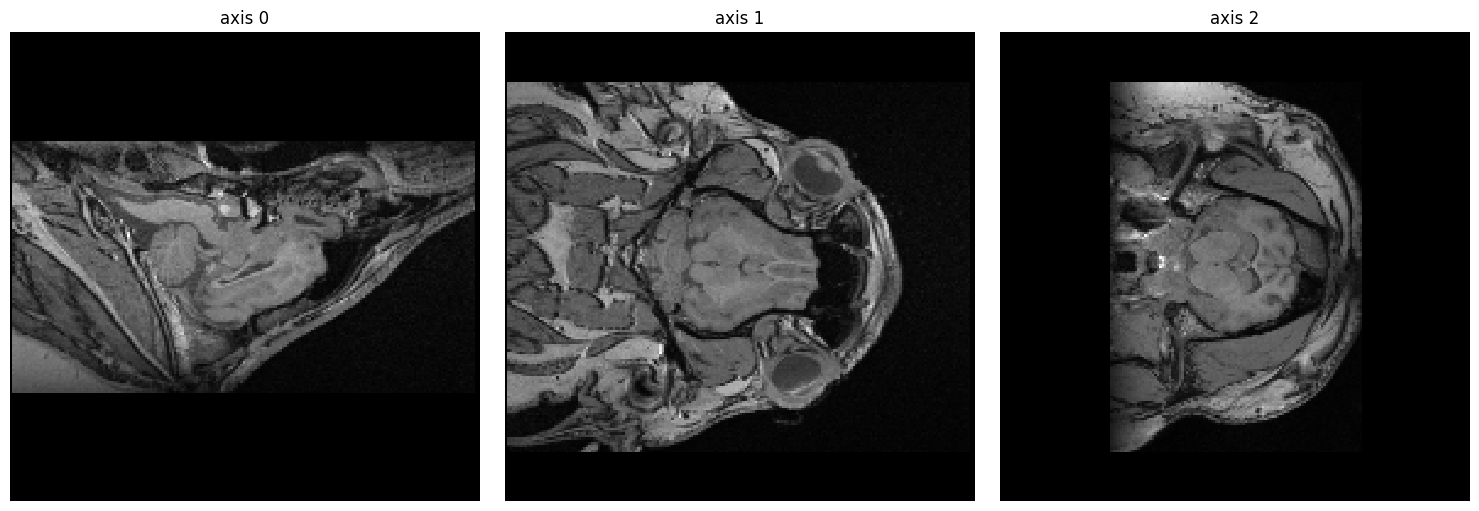

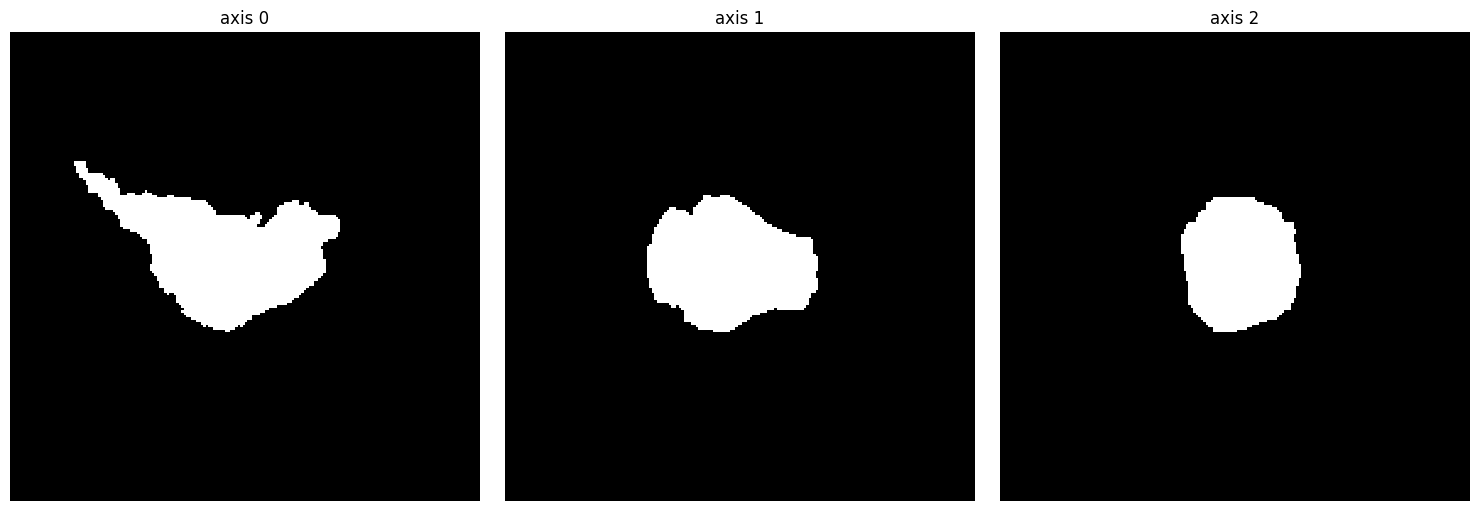

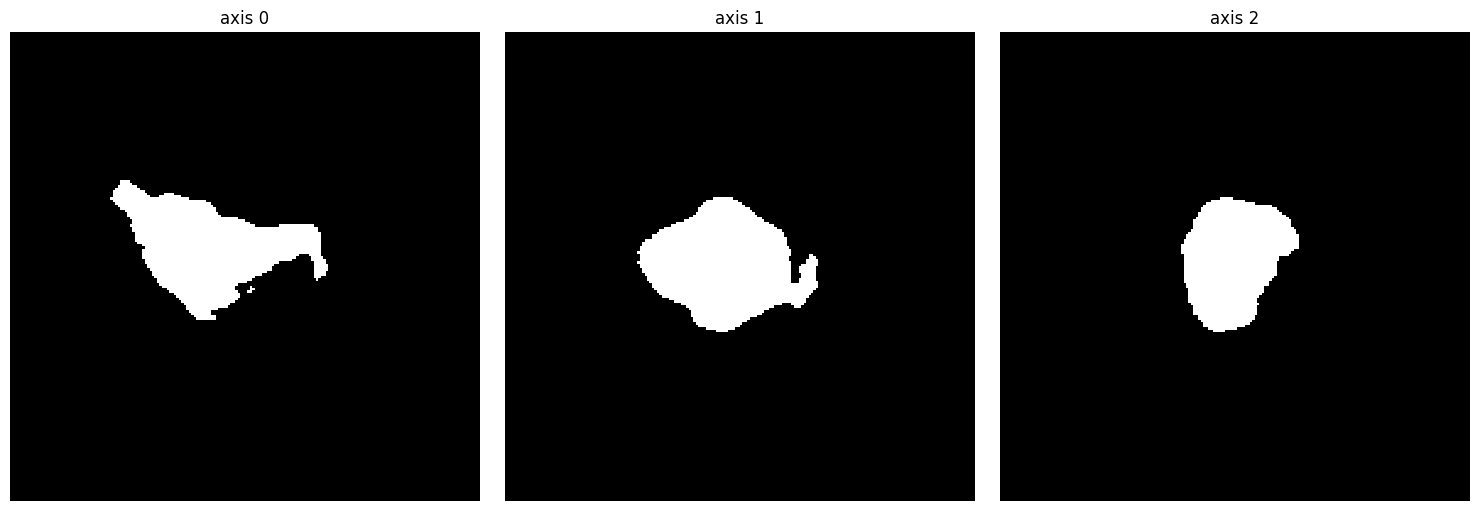

Dice coefficient for JAW-081_1month: 0.7582
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-076_3day/JAW-076_3day_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


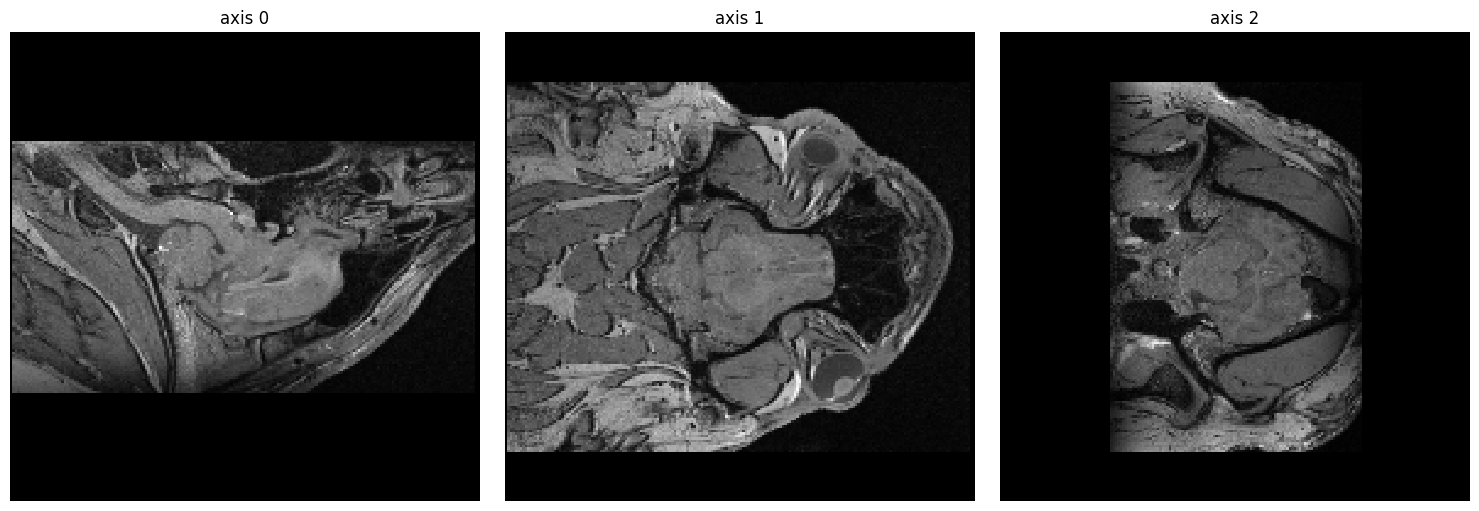

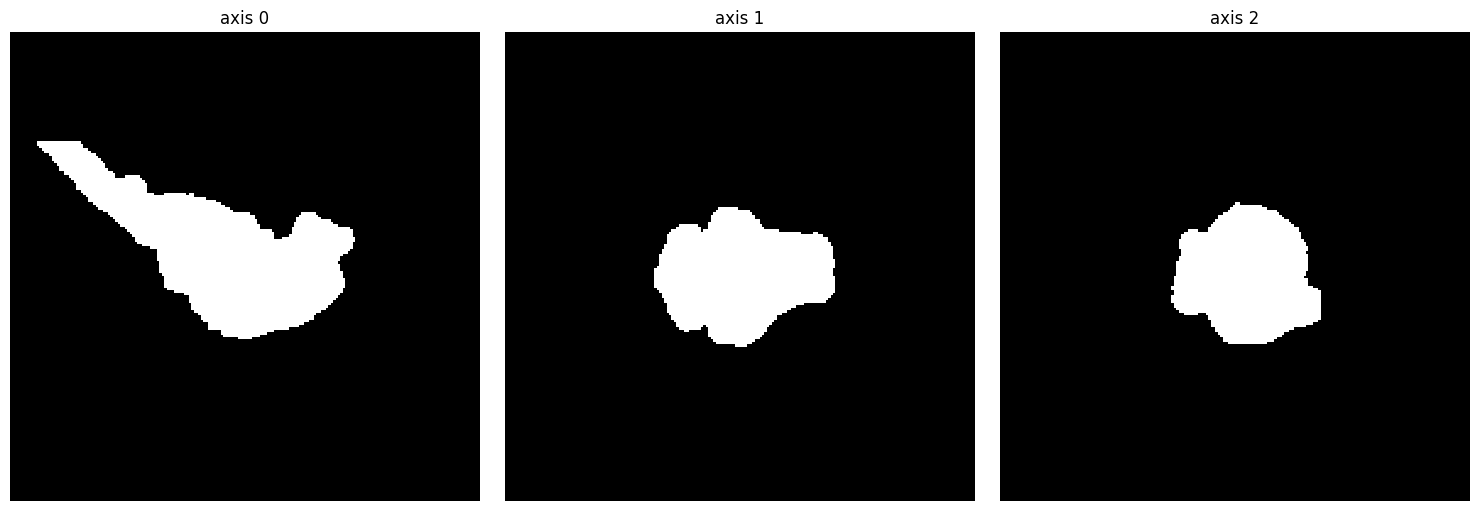

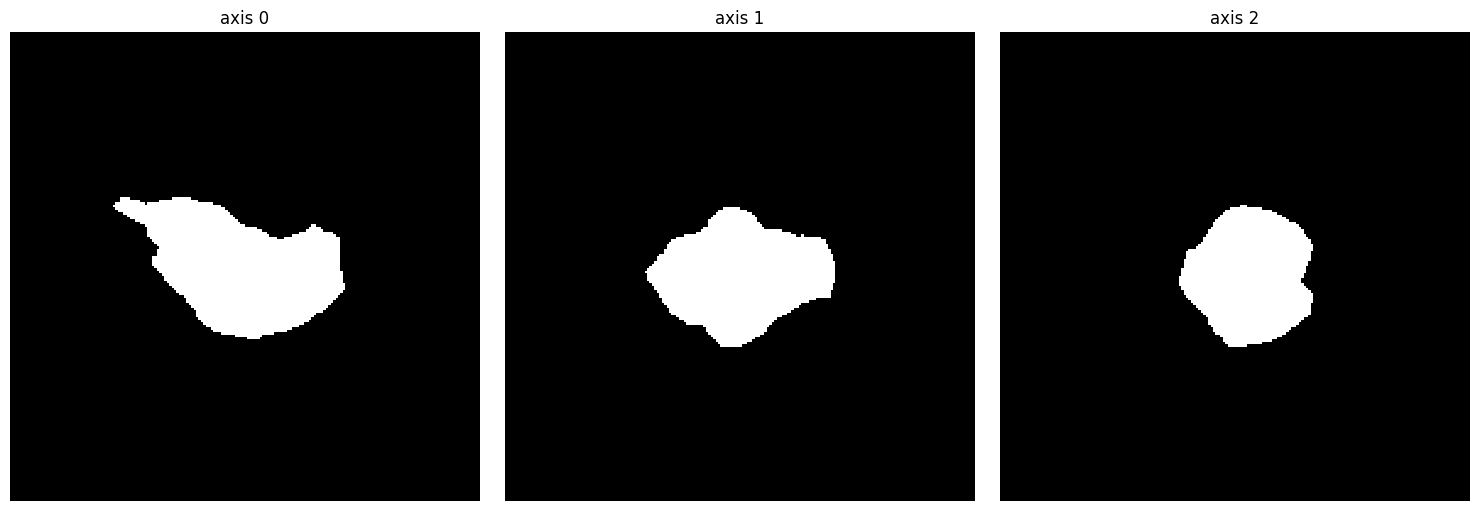

Dice coefficient for JAW-076_3day: 0.8689
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-082/JAW-082_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


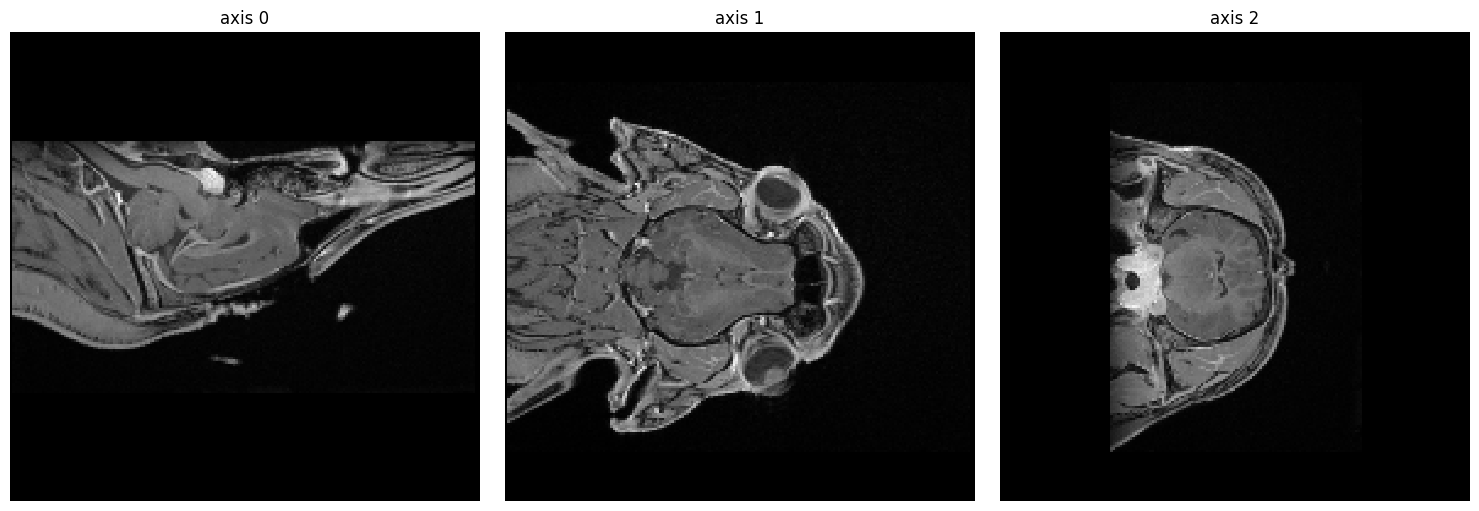

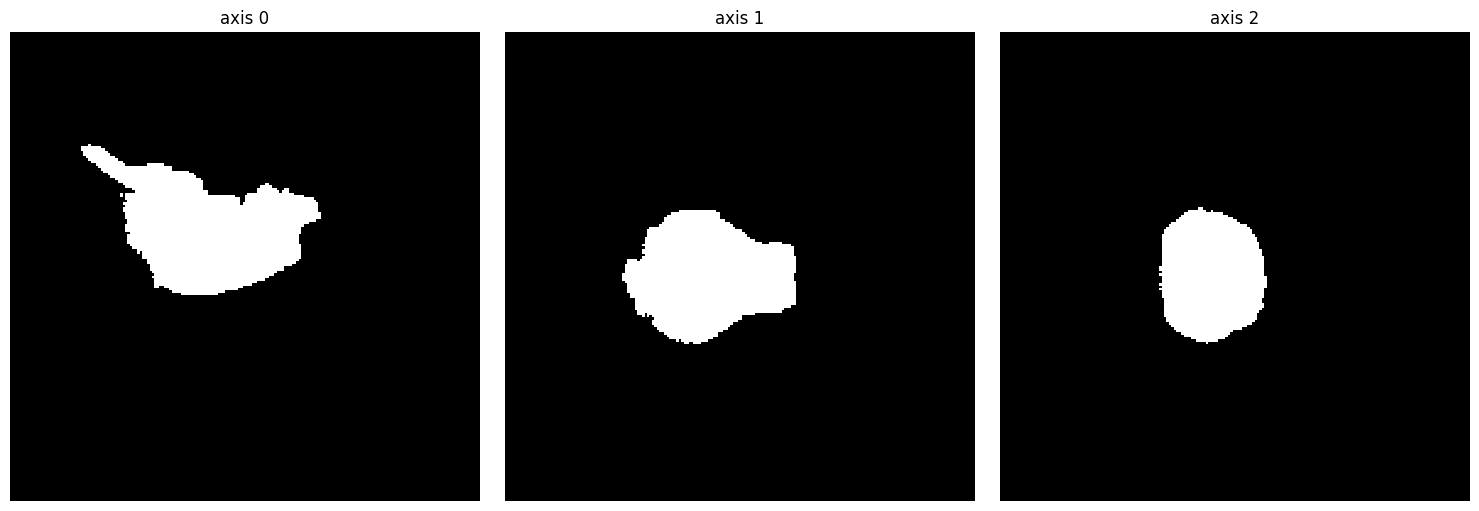

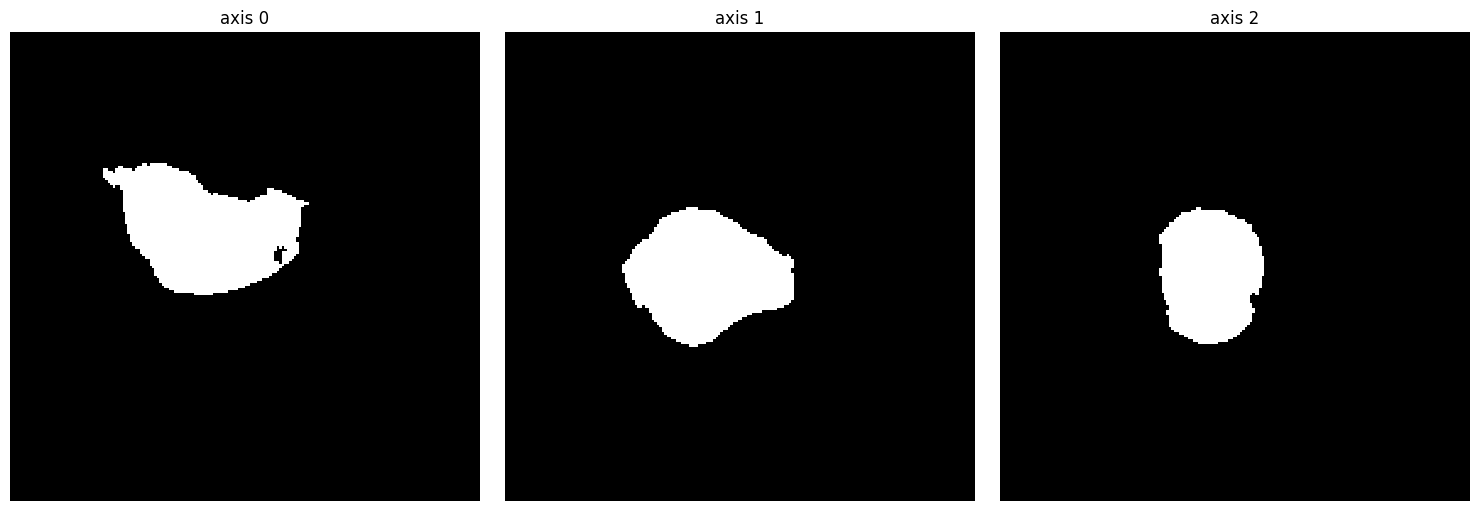

Dice coefficient for JAW-082: 0.8994
NO MASK FOUND
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-099_pre/JAW-099_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


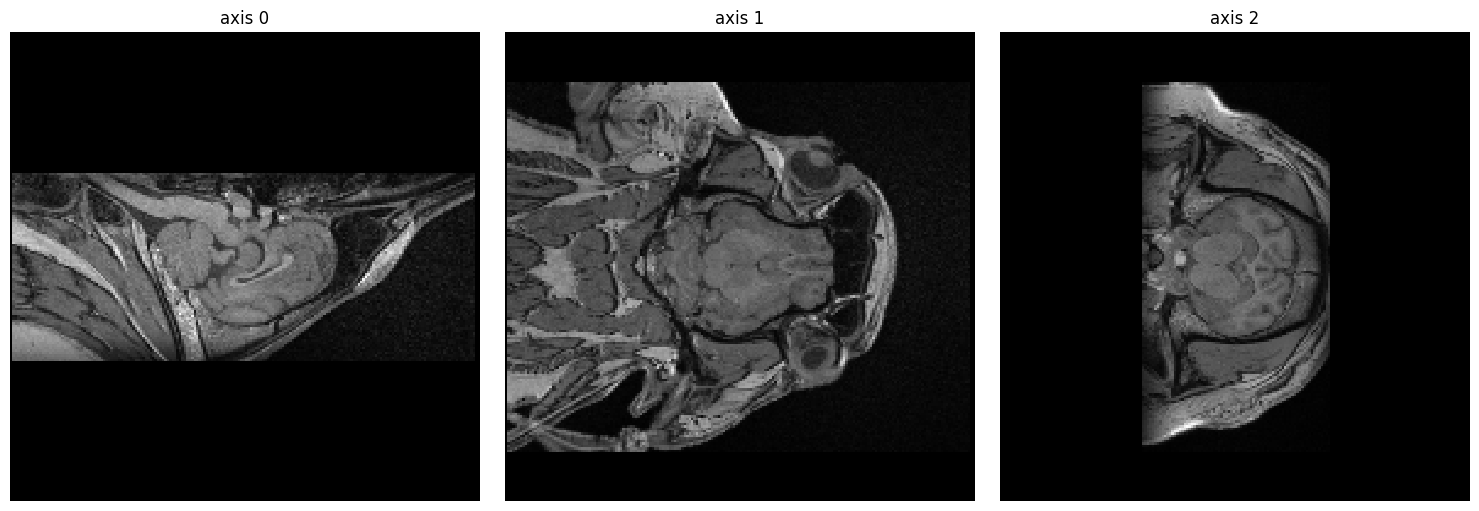

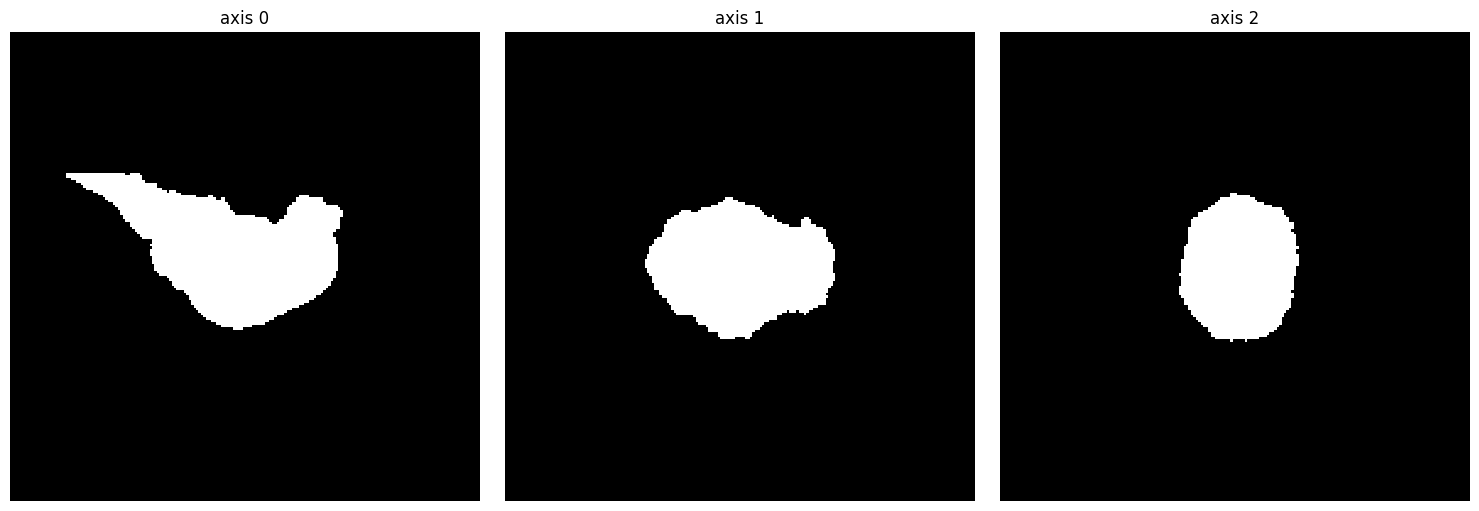

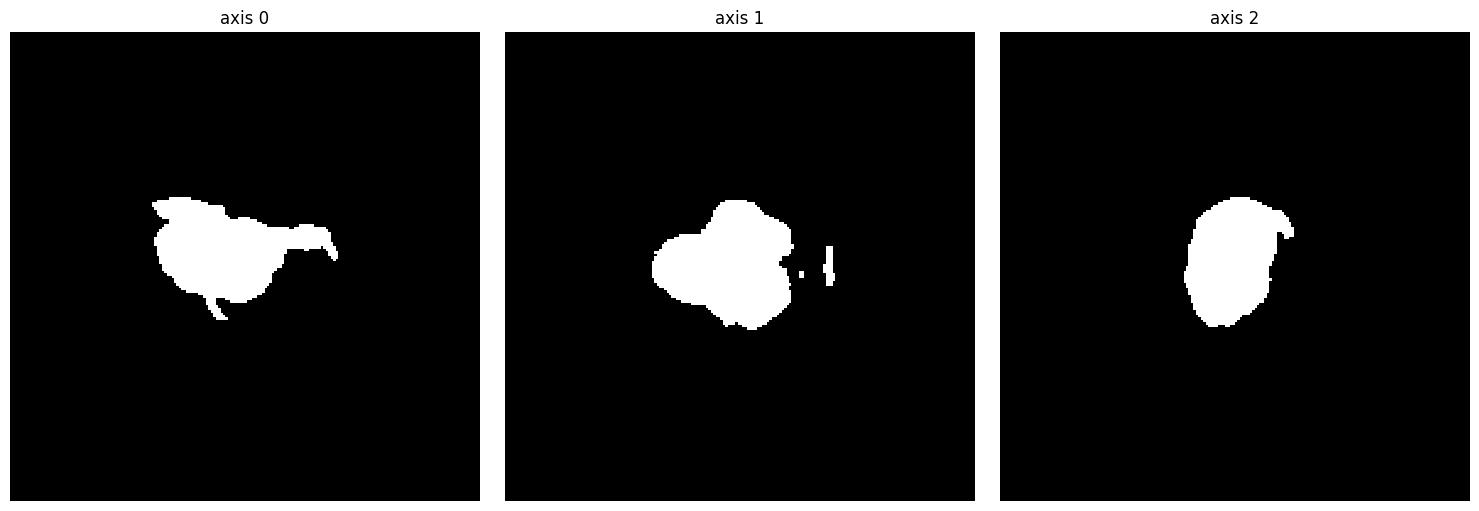

Dice coefficient for JAW-099_pre: 0.6357
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-093_pre/JAW-093_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


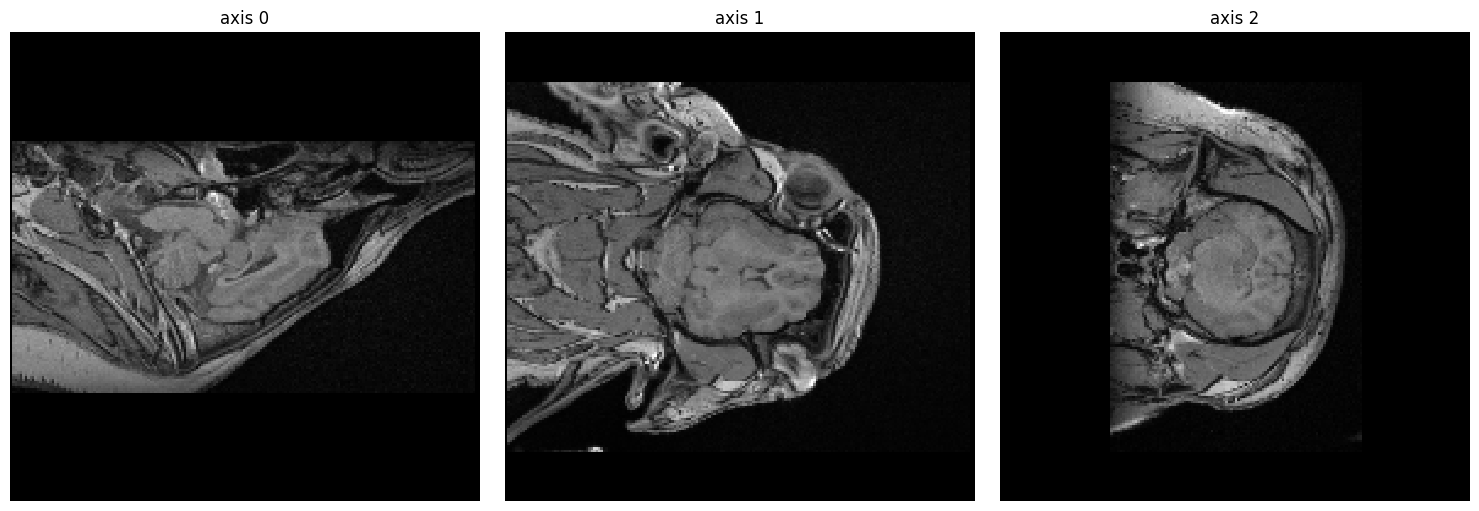

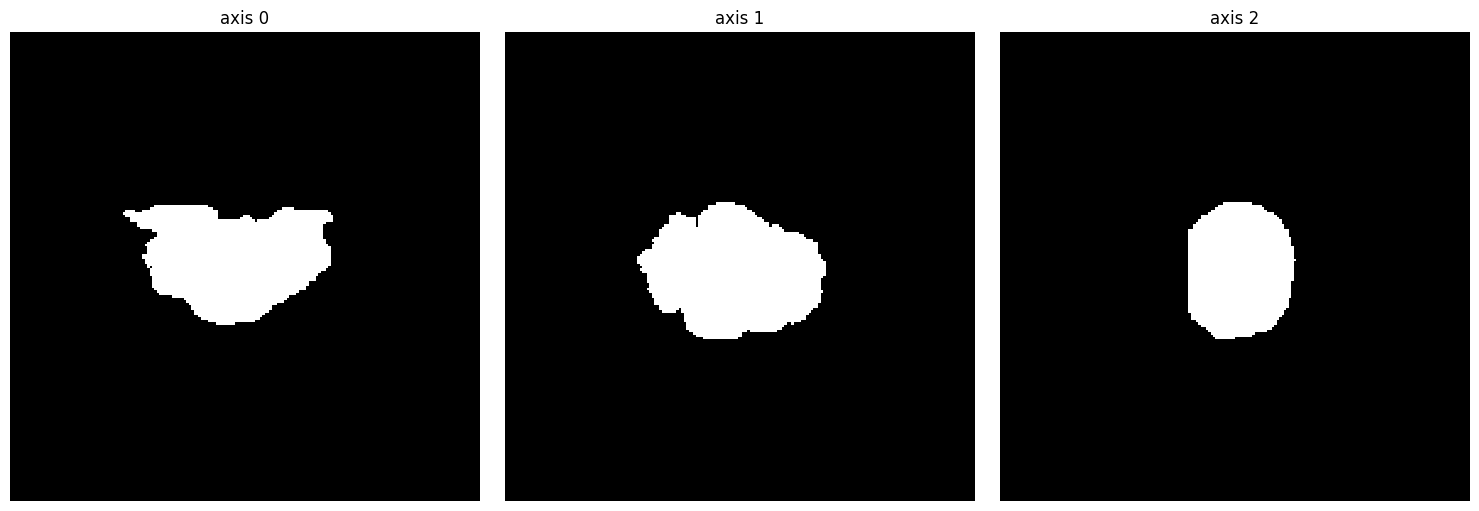

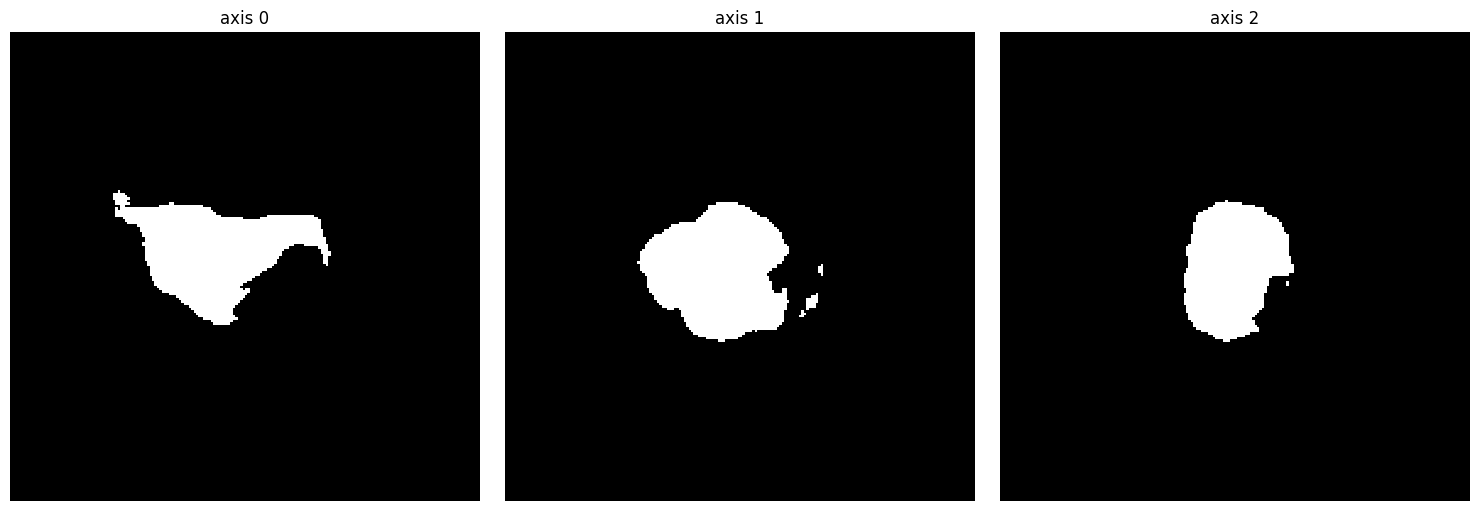

Dice coefficient for JAW-093_pre: 0.8119
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-106_pre/JAW-106_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-081_3day/JAW-081_3day_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


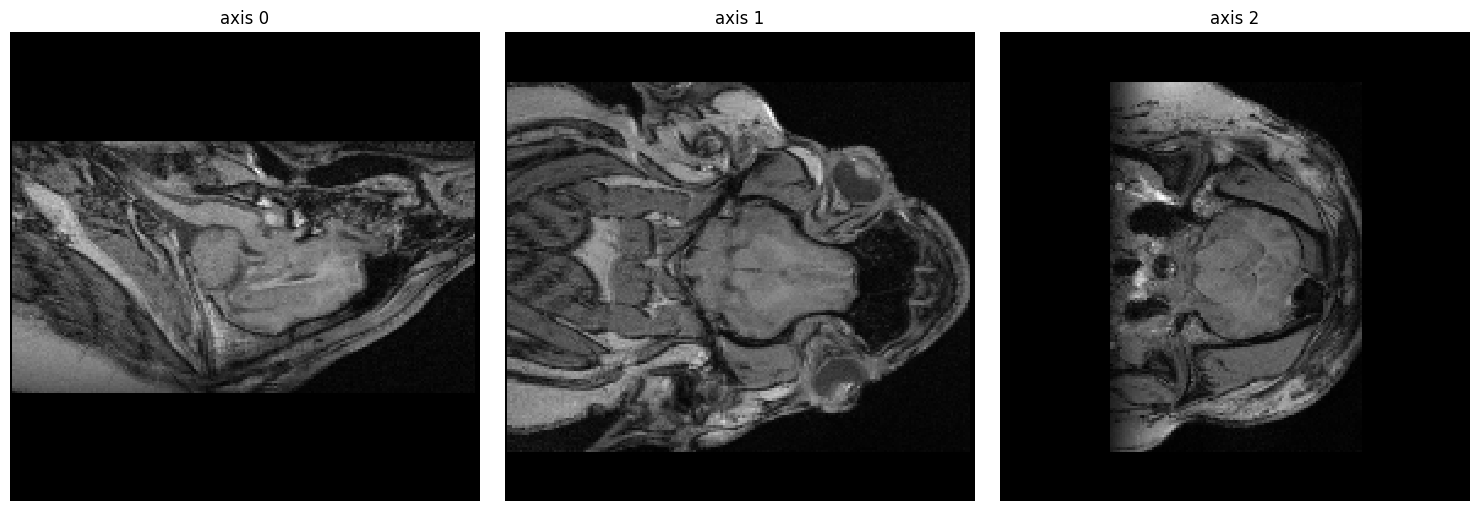

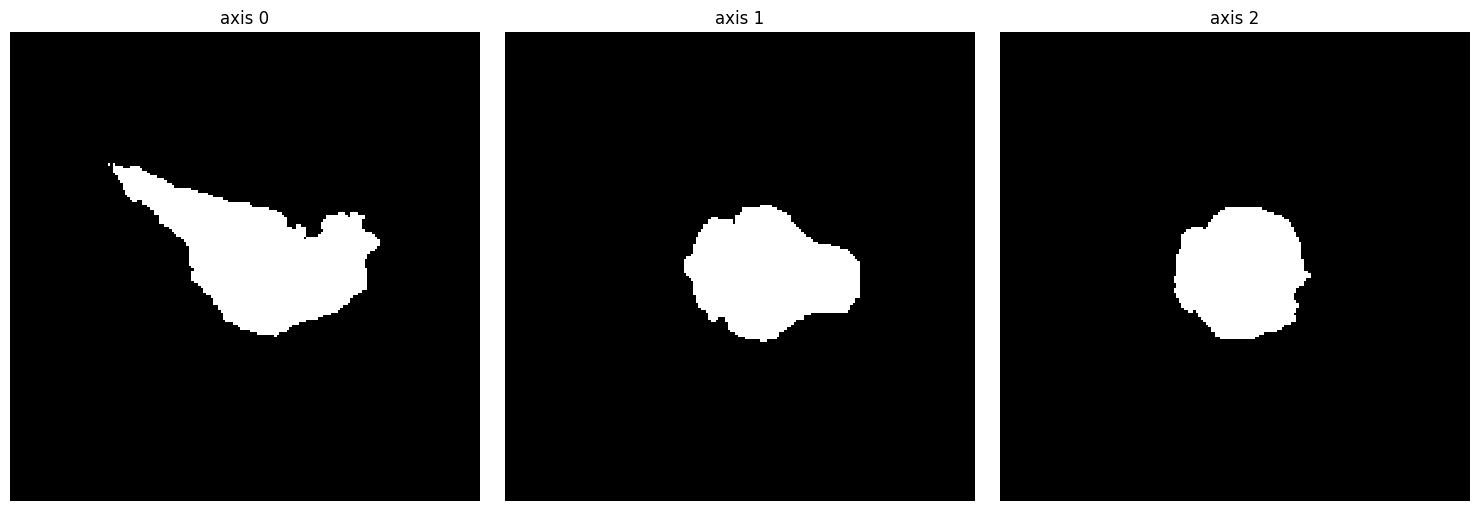

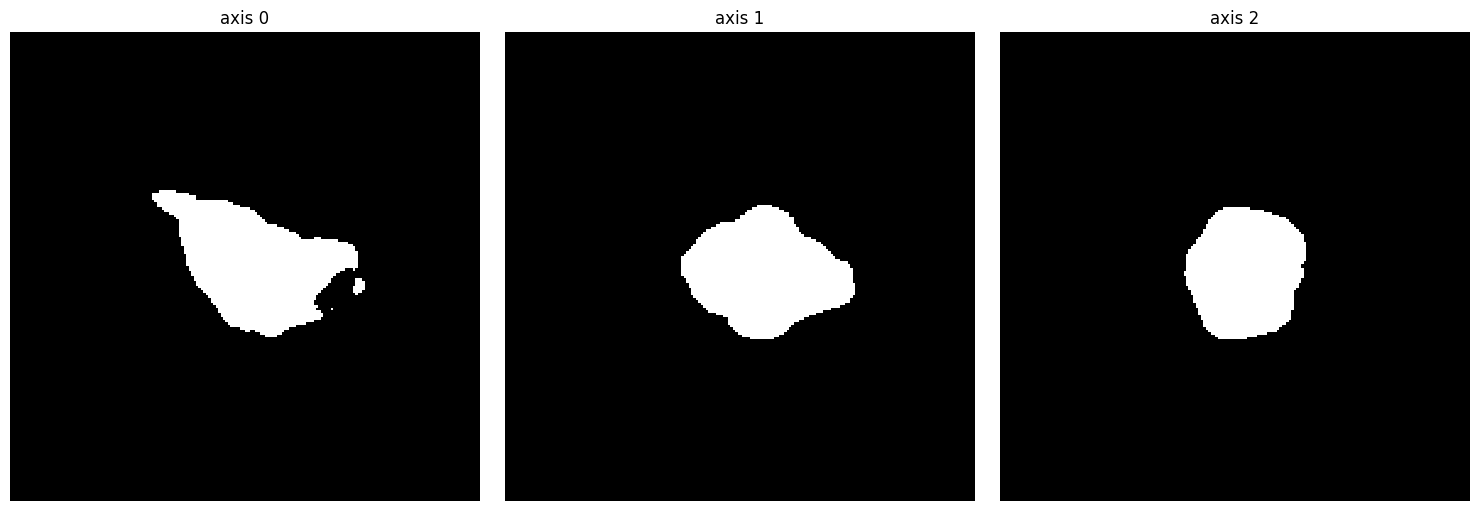

Dice coefficient for JAW-081_3day: 0.8465
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-106_3day/JAW-106_3day_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-097_pre/JAW-097_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


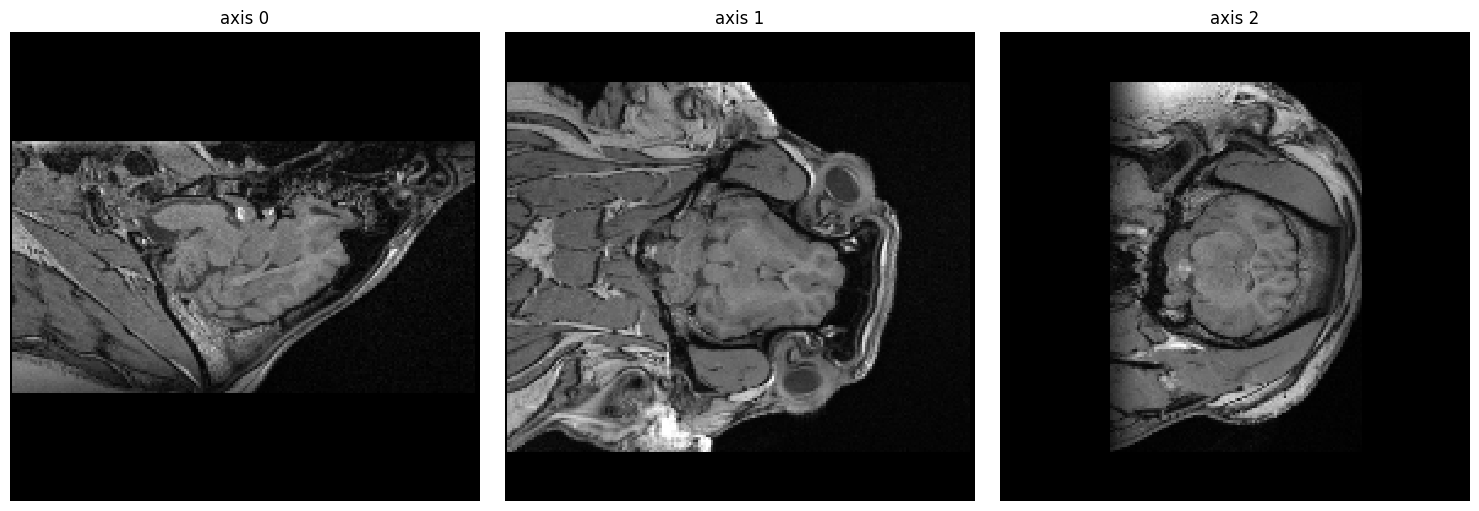

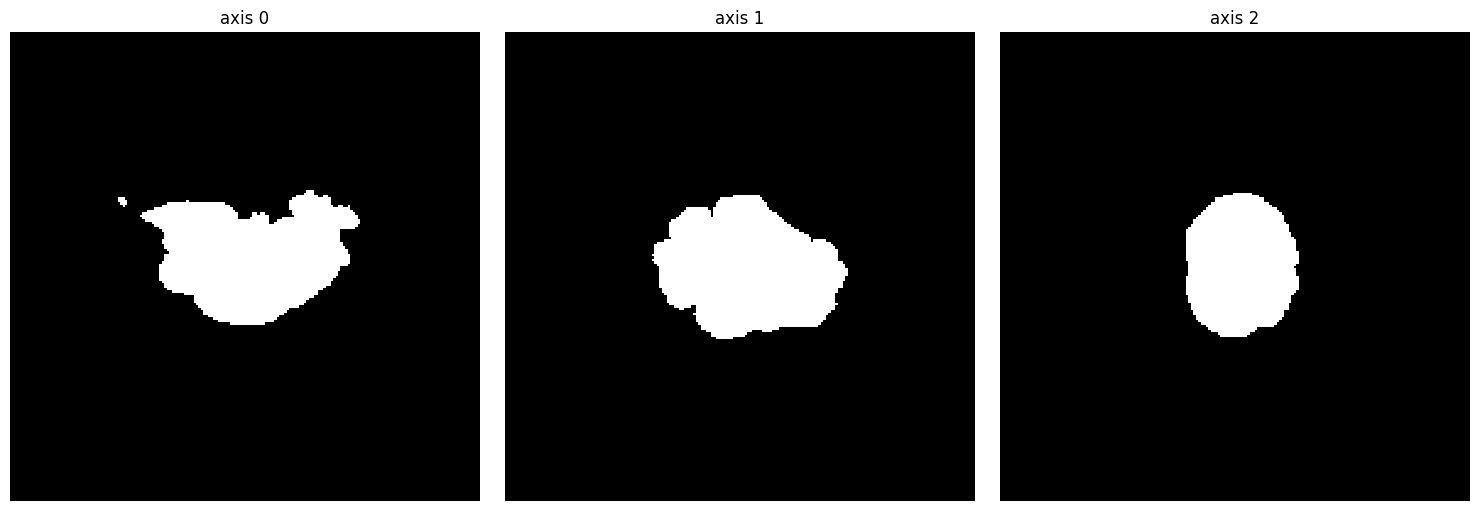

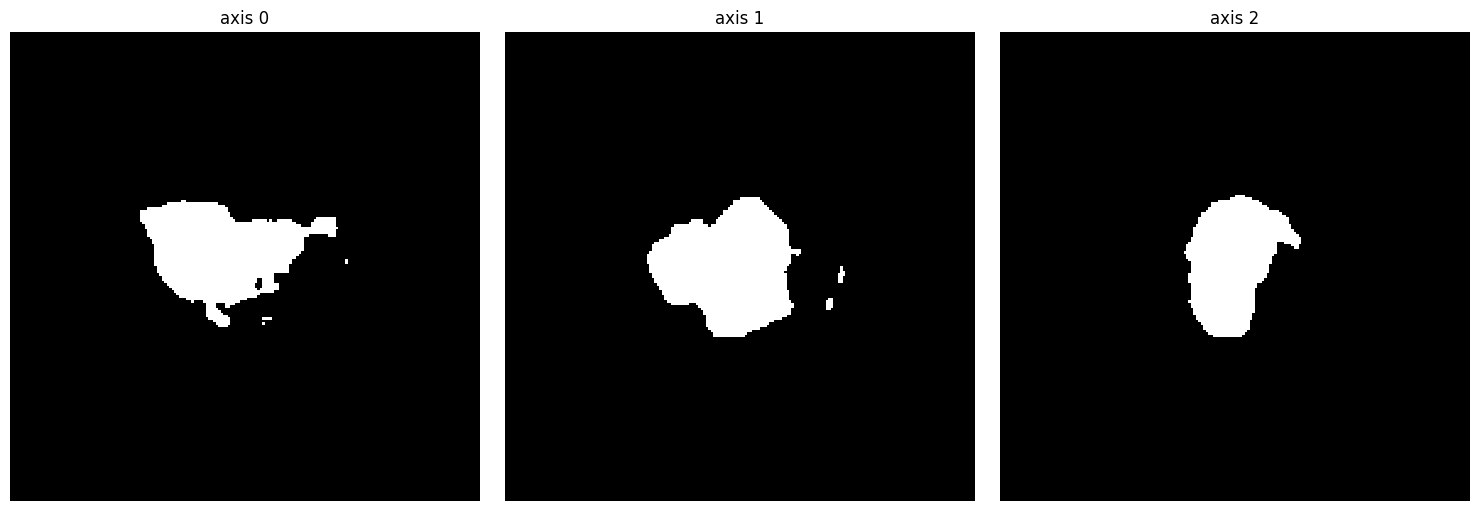

Dice coefficient for JAW-097_pre: 0.7157
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-101_pre/JAW-101_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


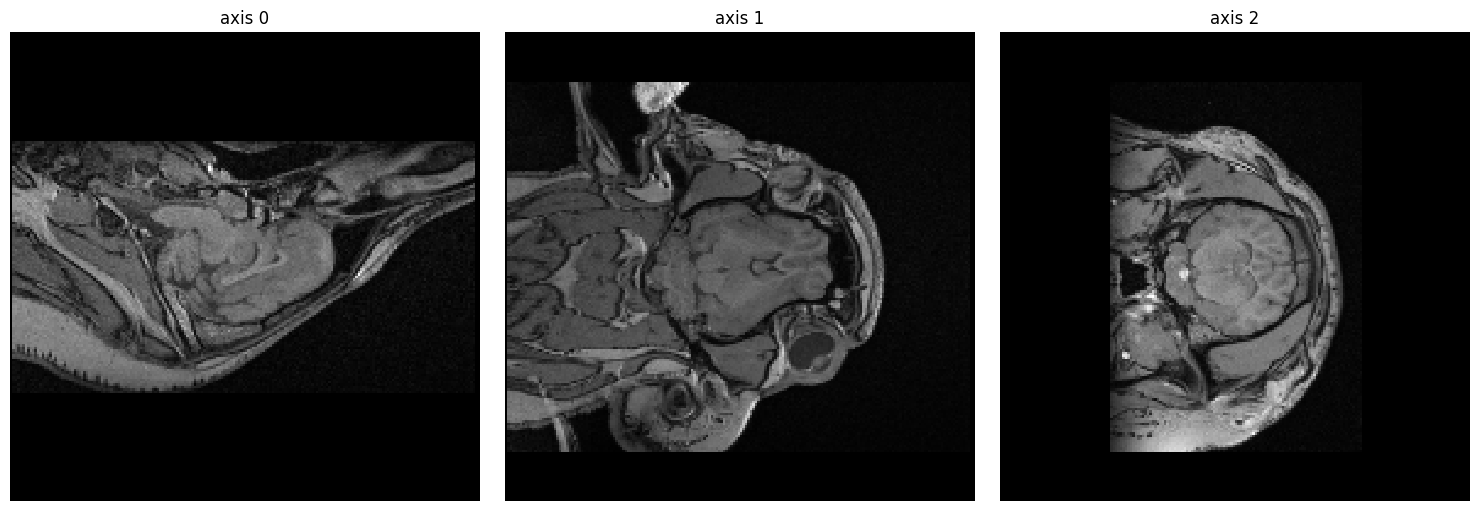

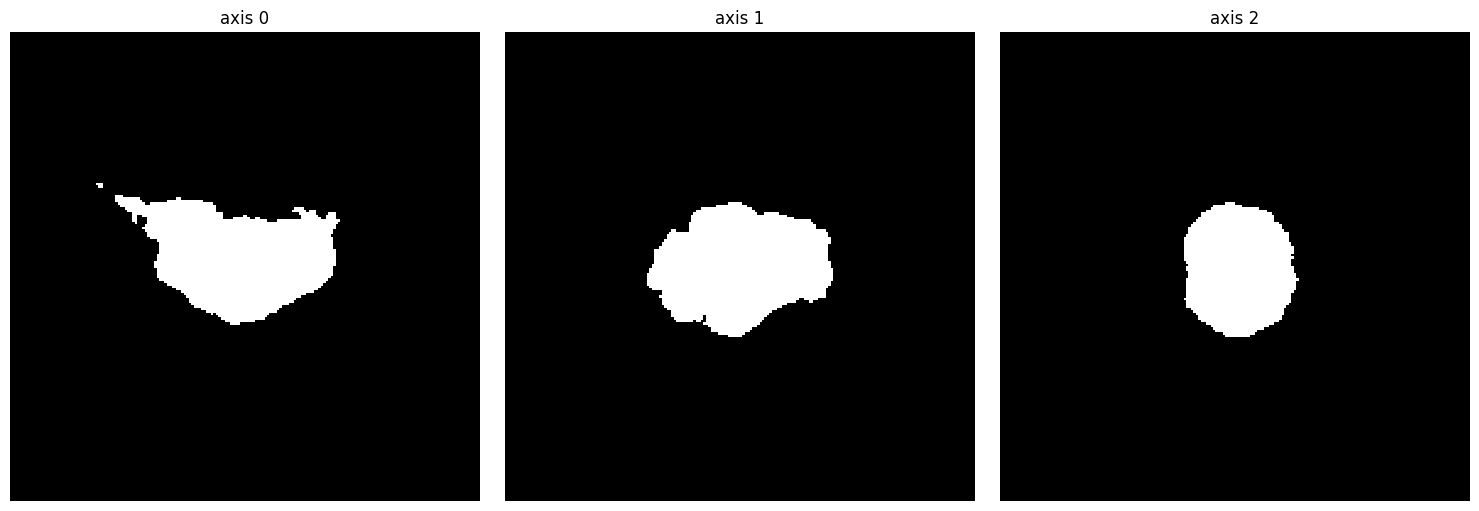

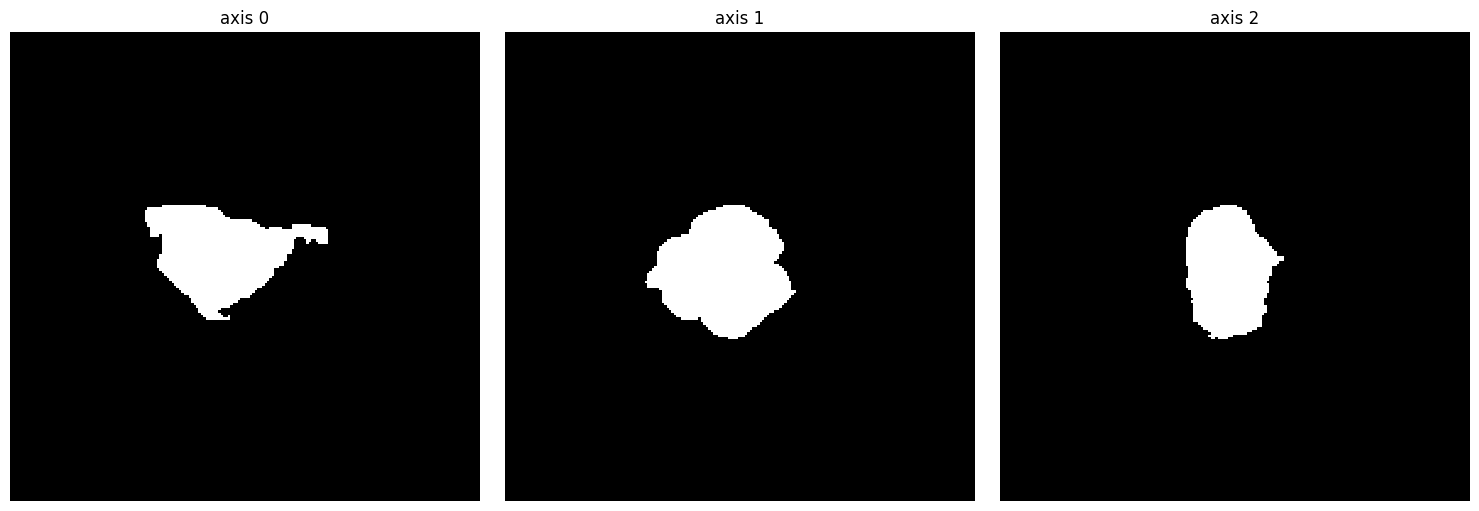

Dice coefficient for JAW-101_pre: 0.7256
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-076_pre/JAW-076_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


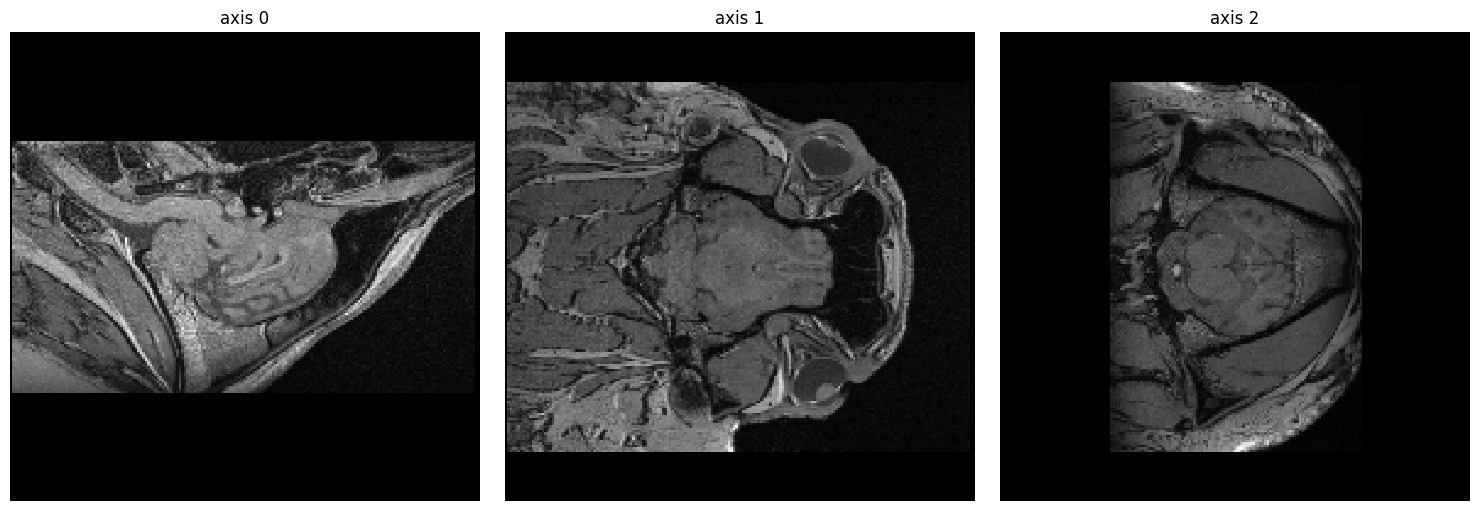

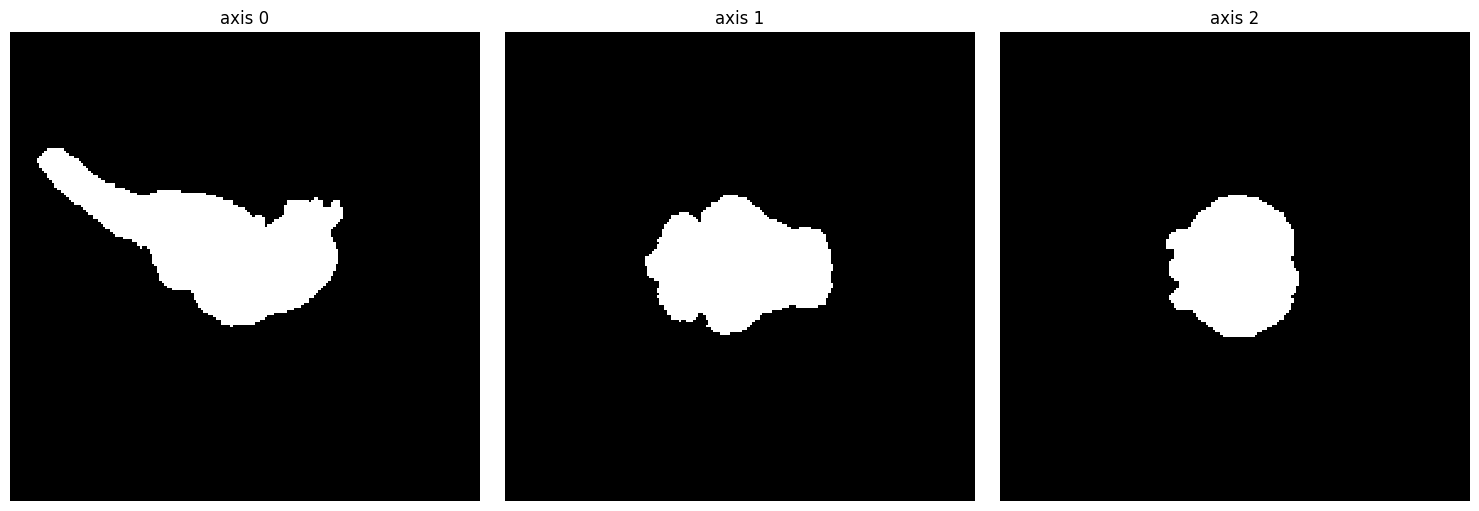

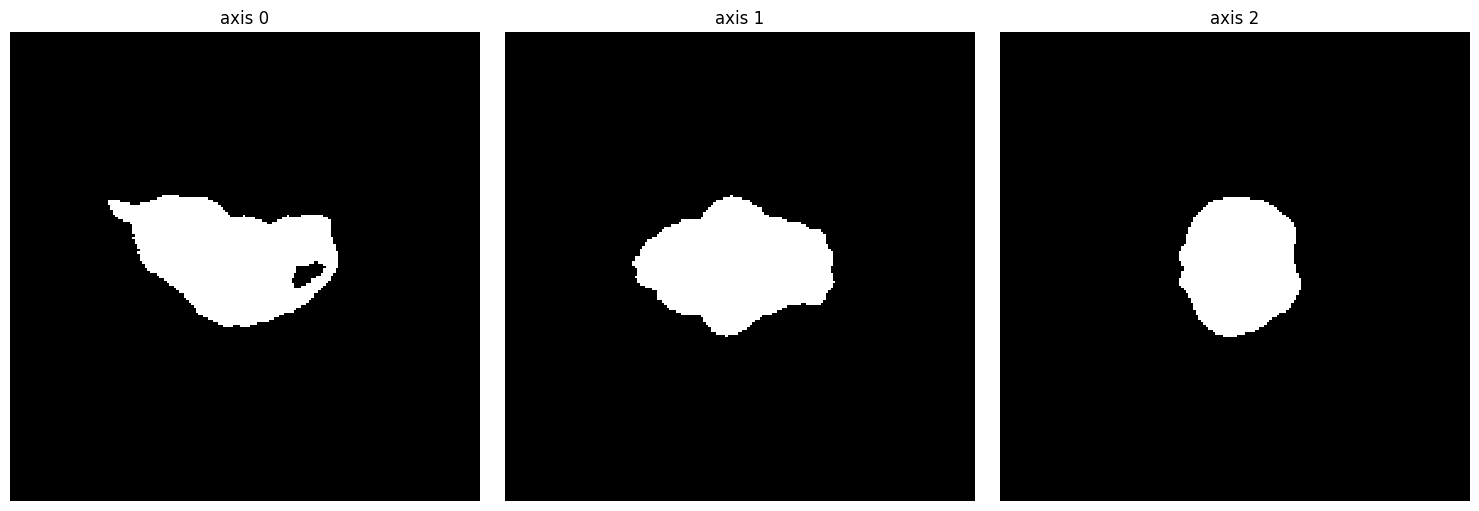

Dice coefficient for JAW-076_pre: 0.8464
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-081_pre/JAW-081_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


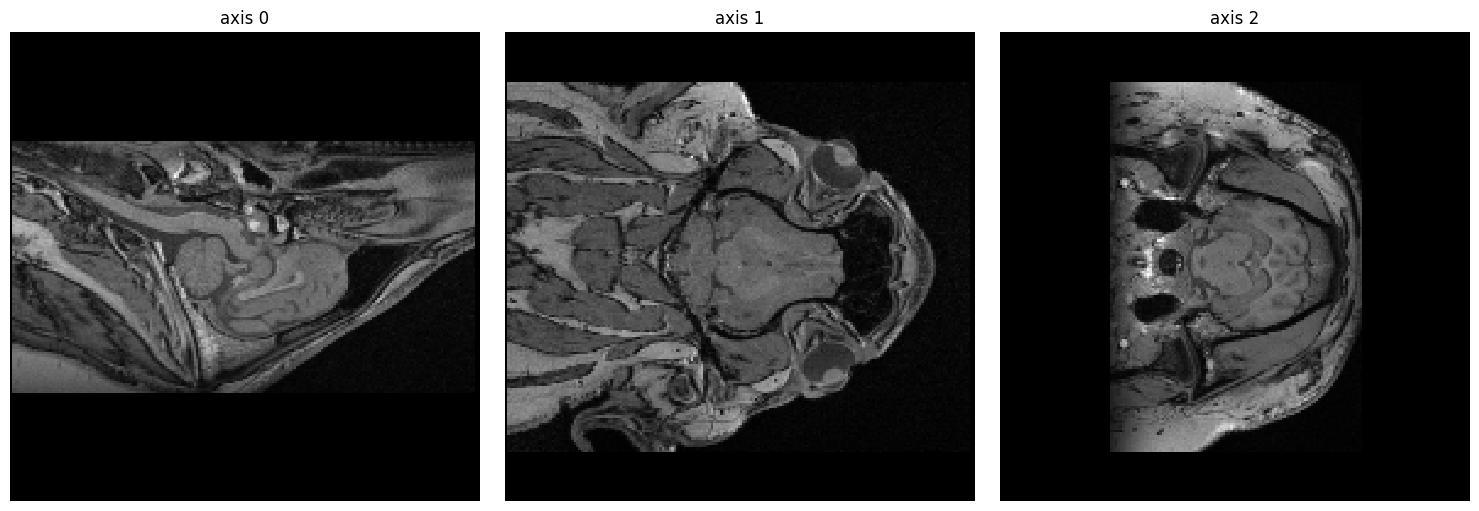

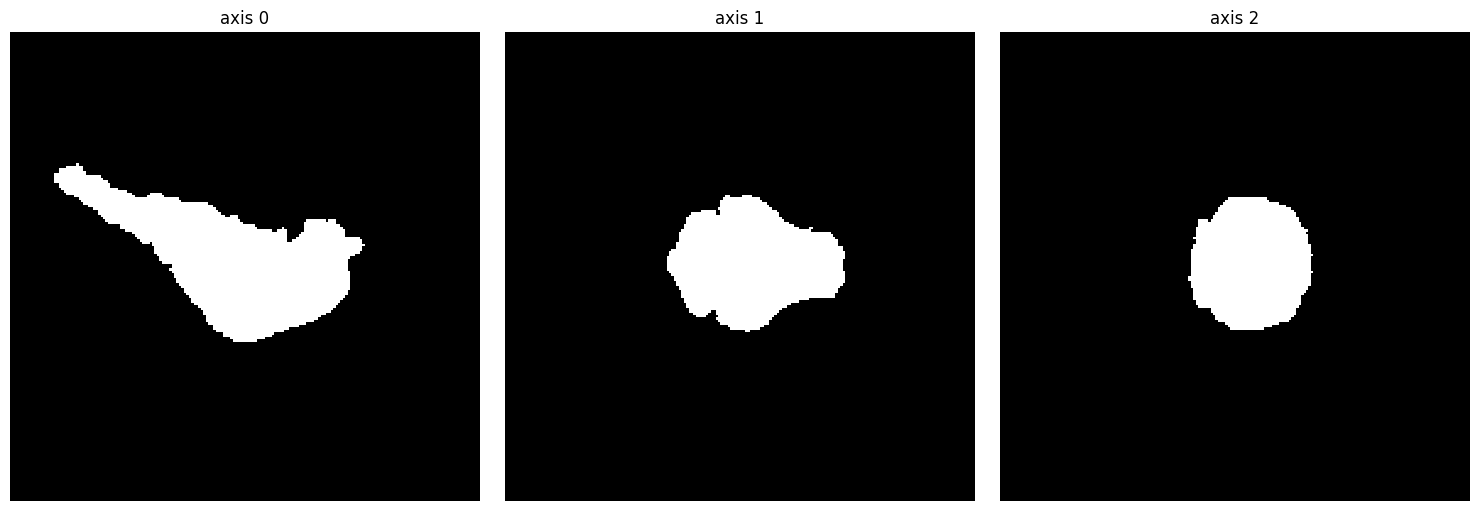

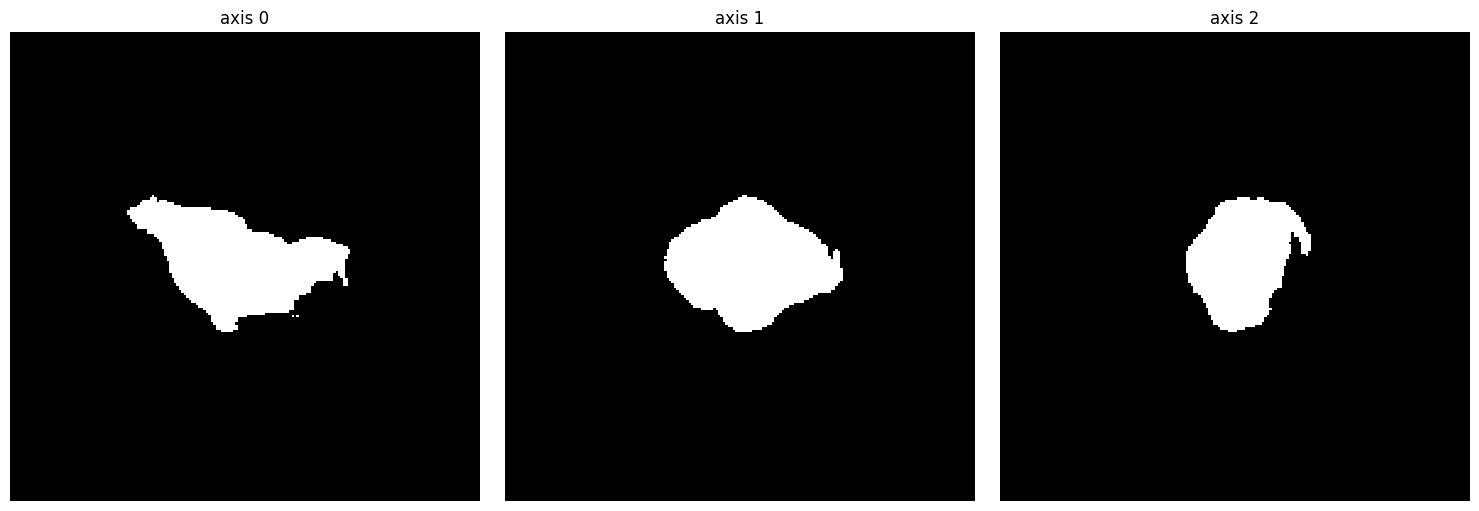

Dice coefficient for JAW-081_pre: 0.7724
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-096_pre/JAW-096_pre_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


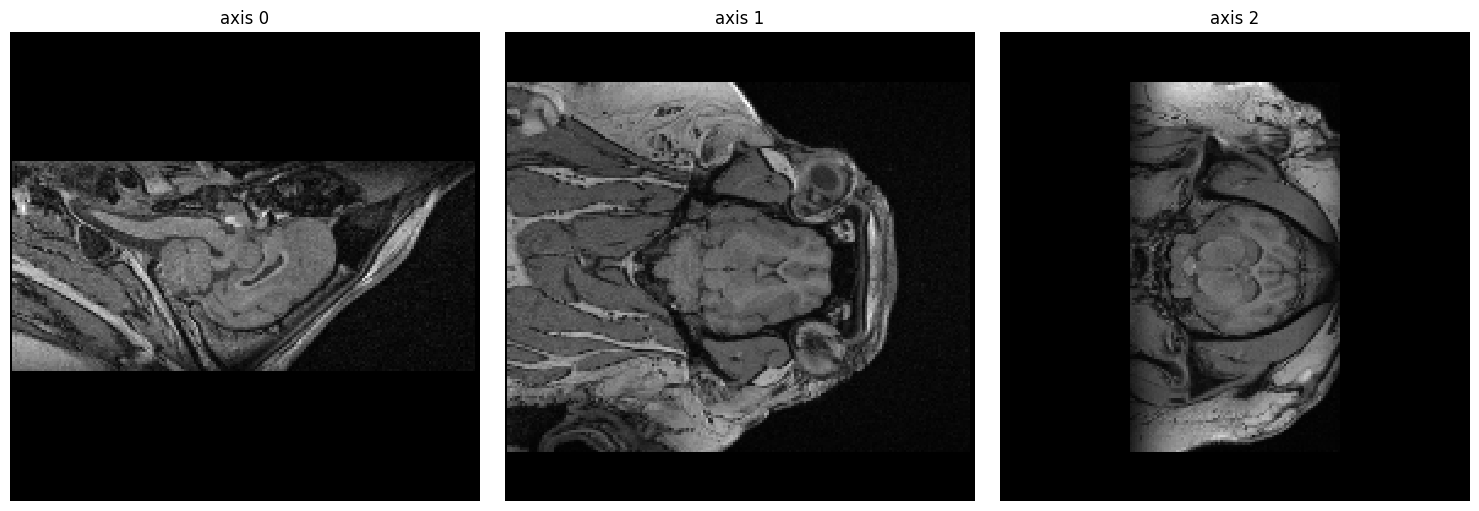

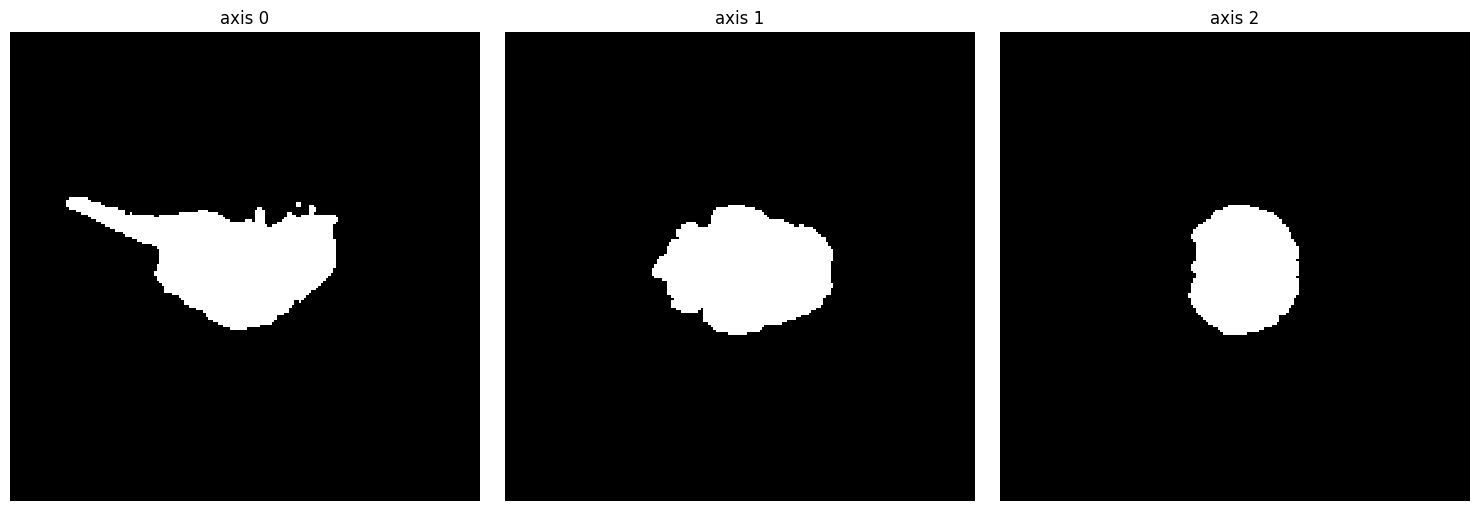

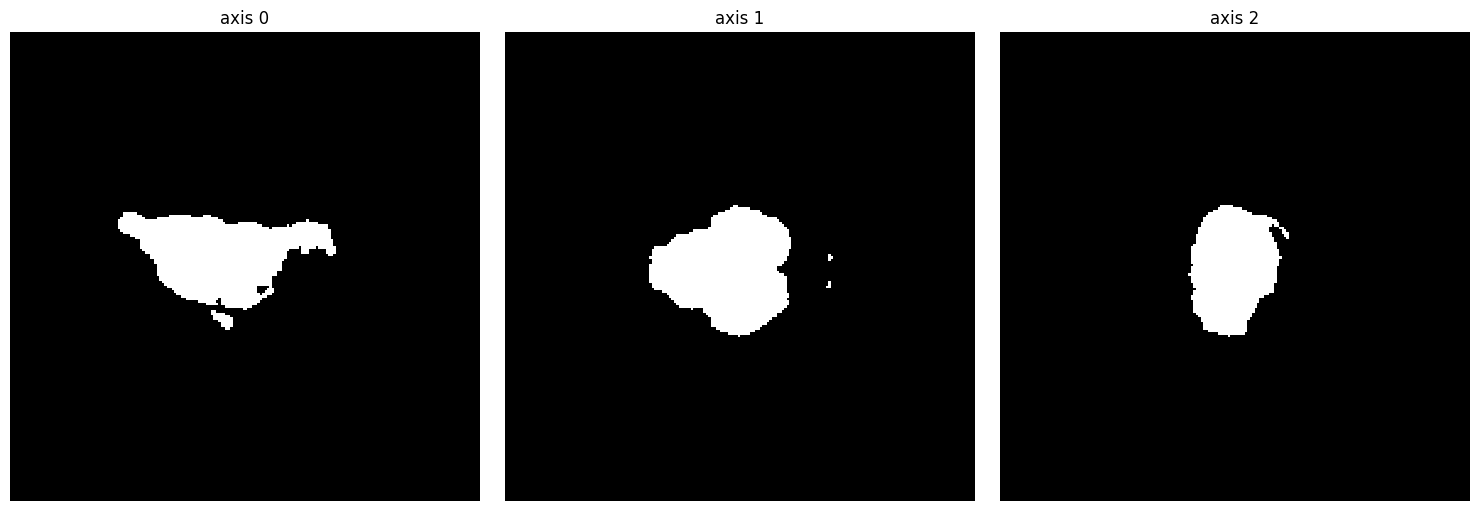

Dice coefficient for JAW-096_pre: 0.7140
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-106_3month/JAW-106_3month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-076_6month/JAW-076_6month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


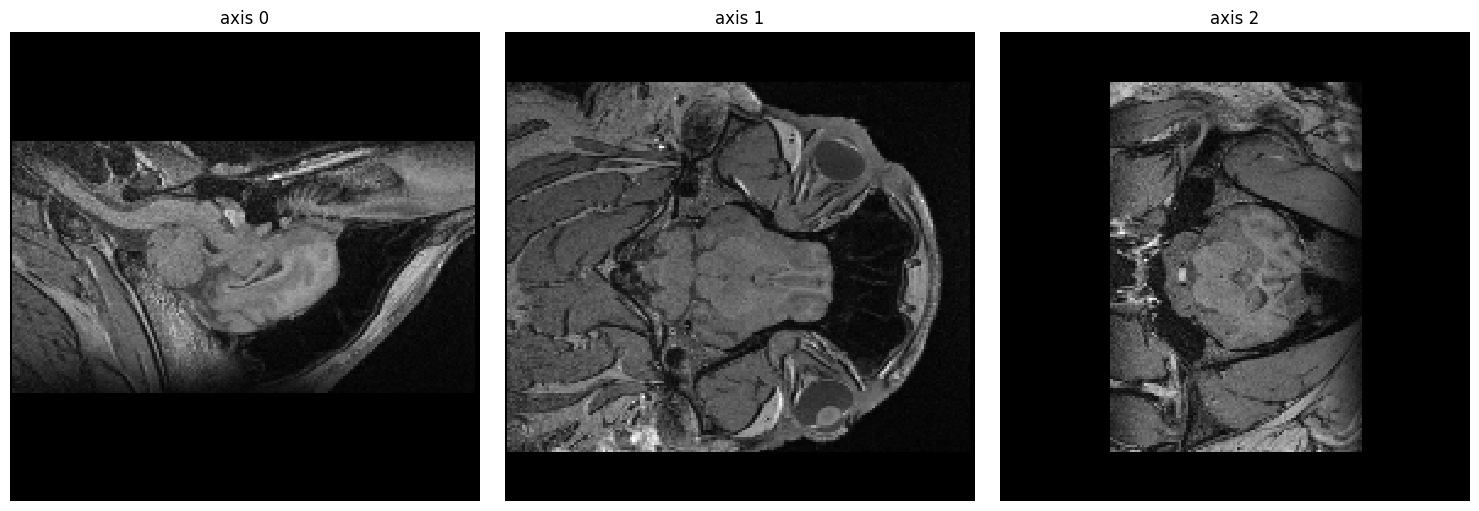

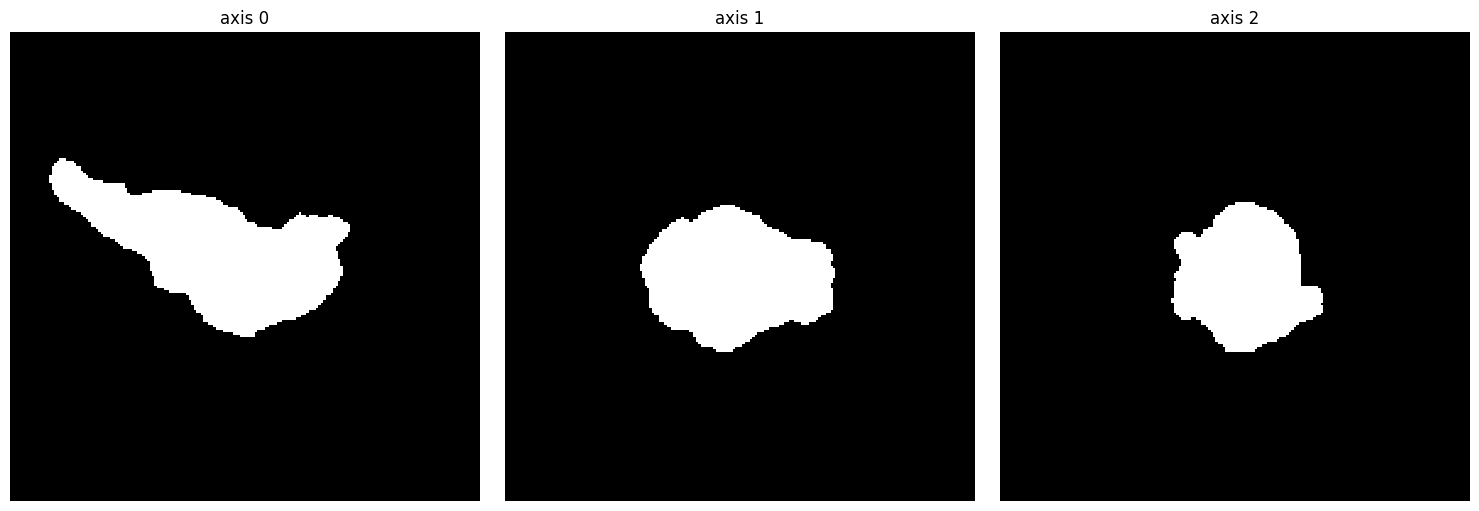

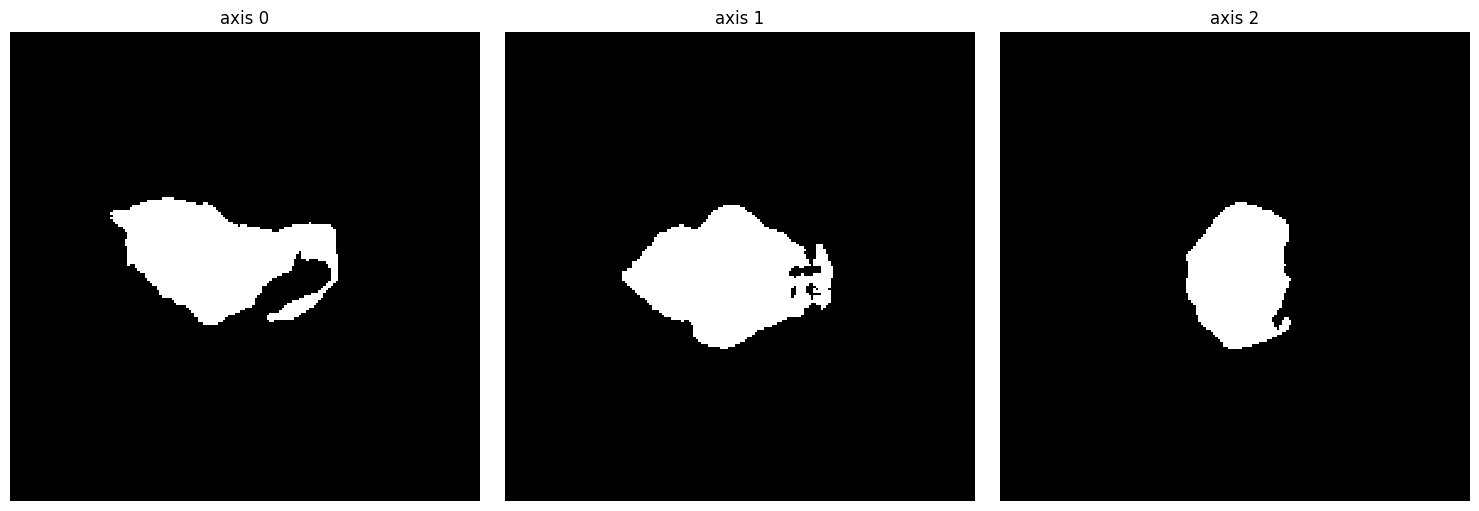

Dice coefficient for JAW-076_6month: 0.7691
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-081_6month/JAW-081_6month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


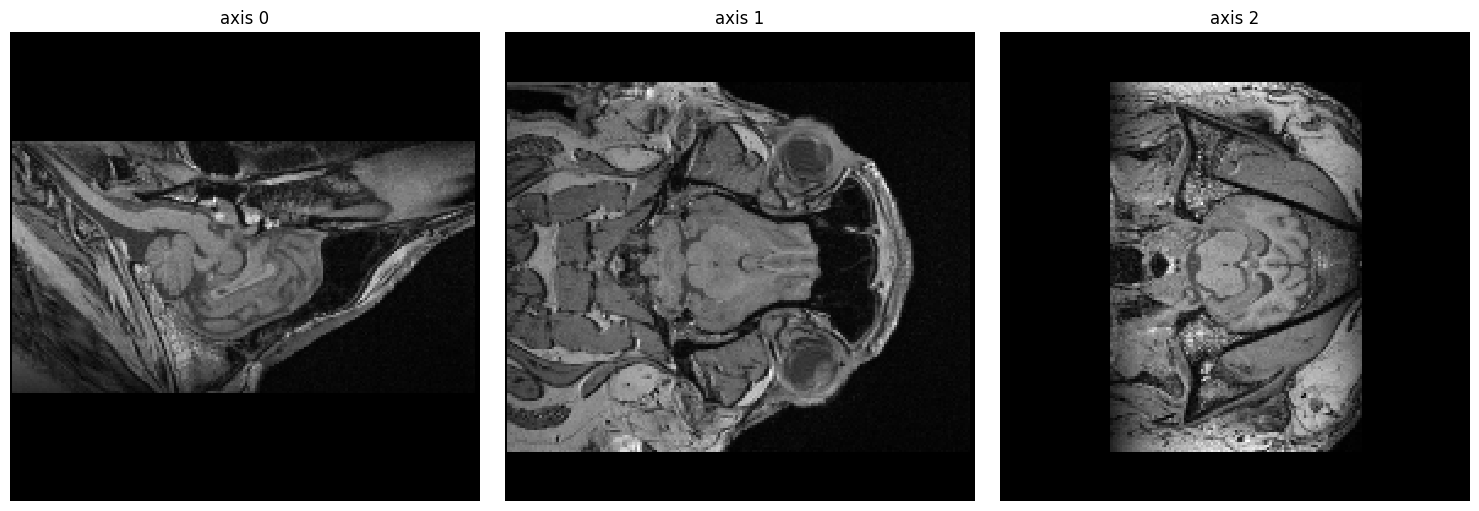

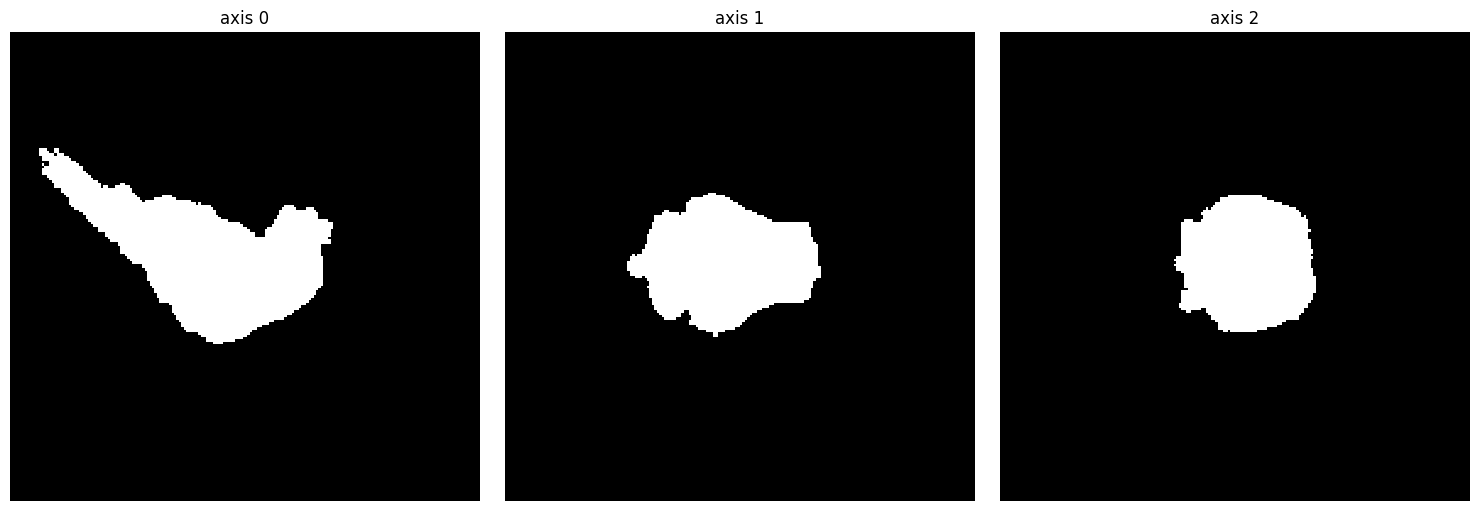

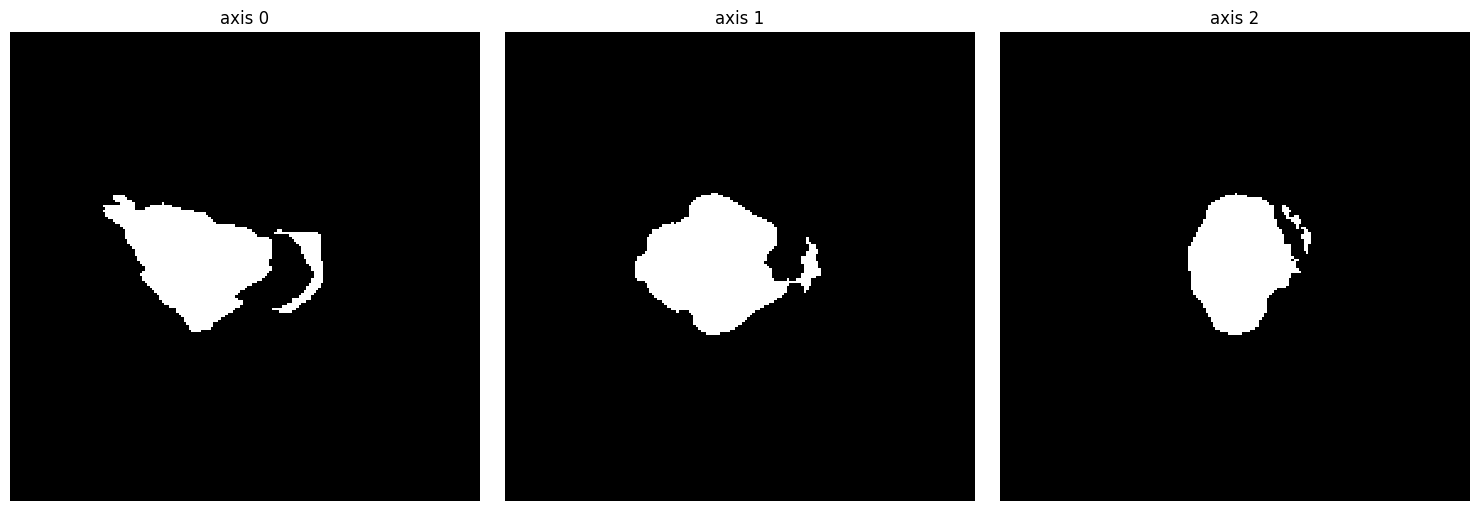

Dice coefficient for JAW-081_6month: 0.7172
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-081_3month/JAW-081_3month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


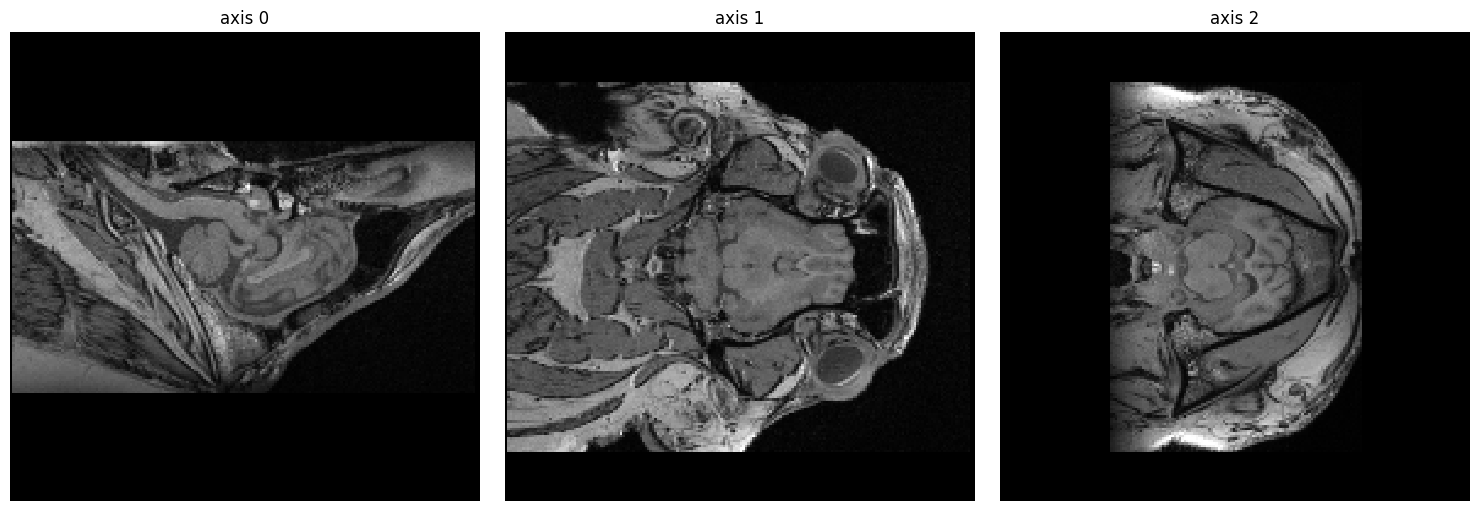

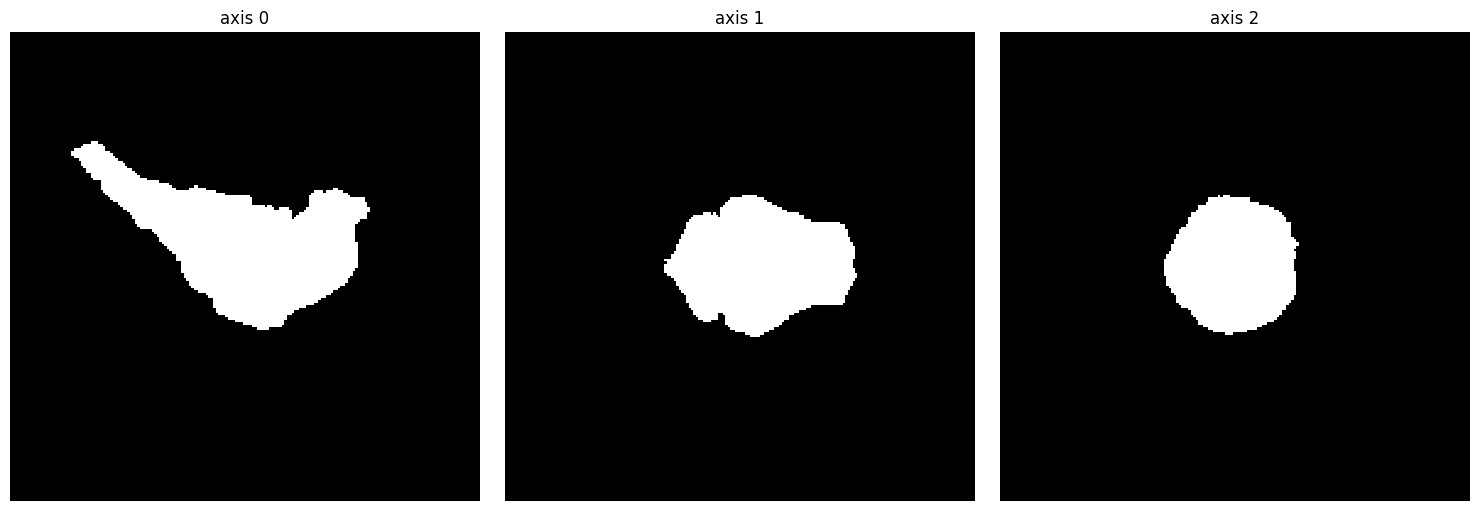

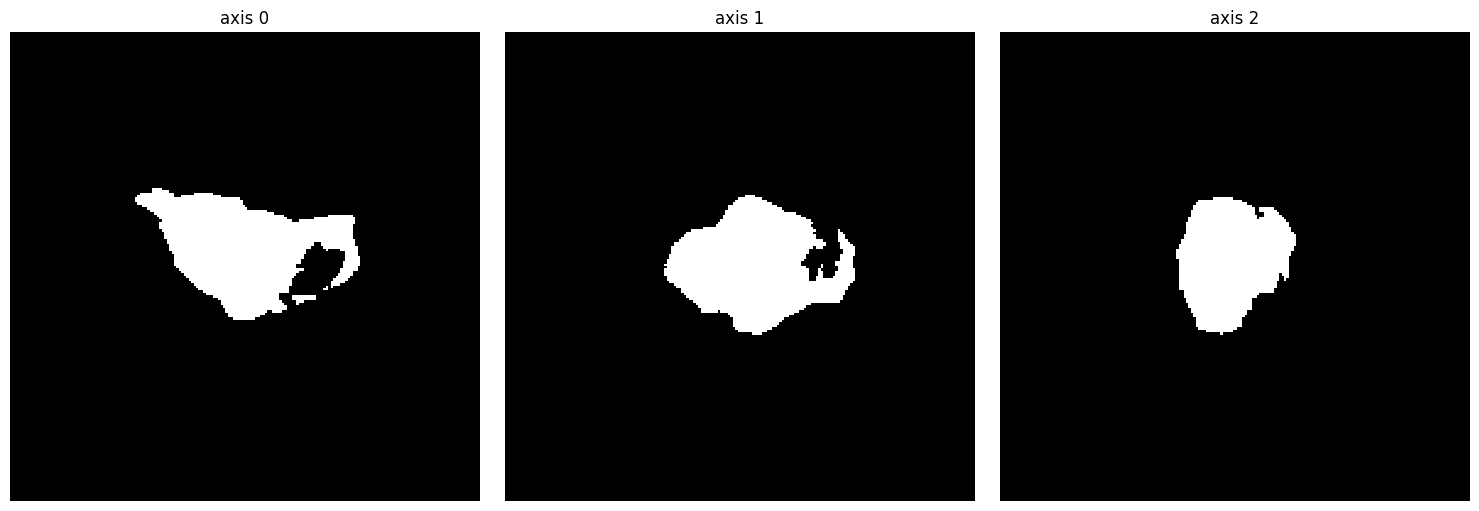

Dice coefficient for JAW-081_3month: 0.7608
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-076_1month/JAW-076_1month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


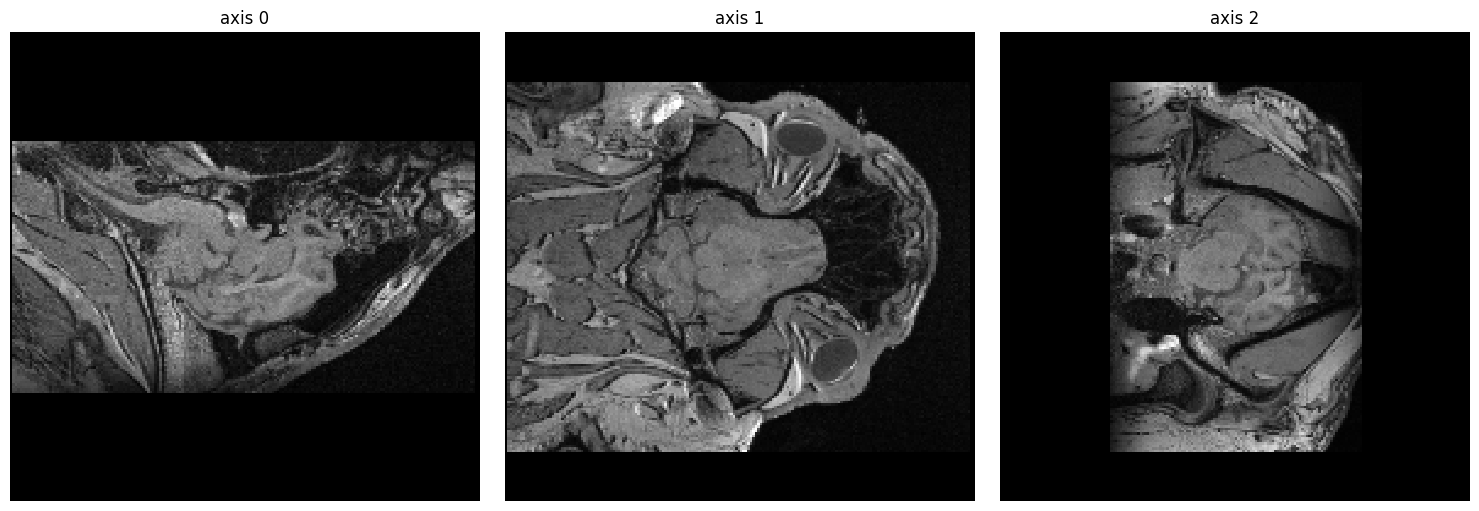

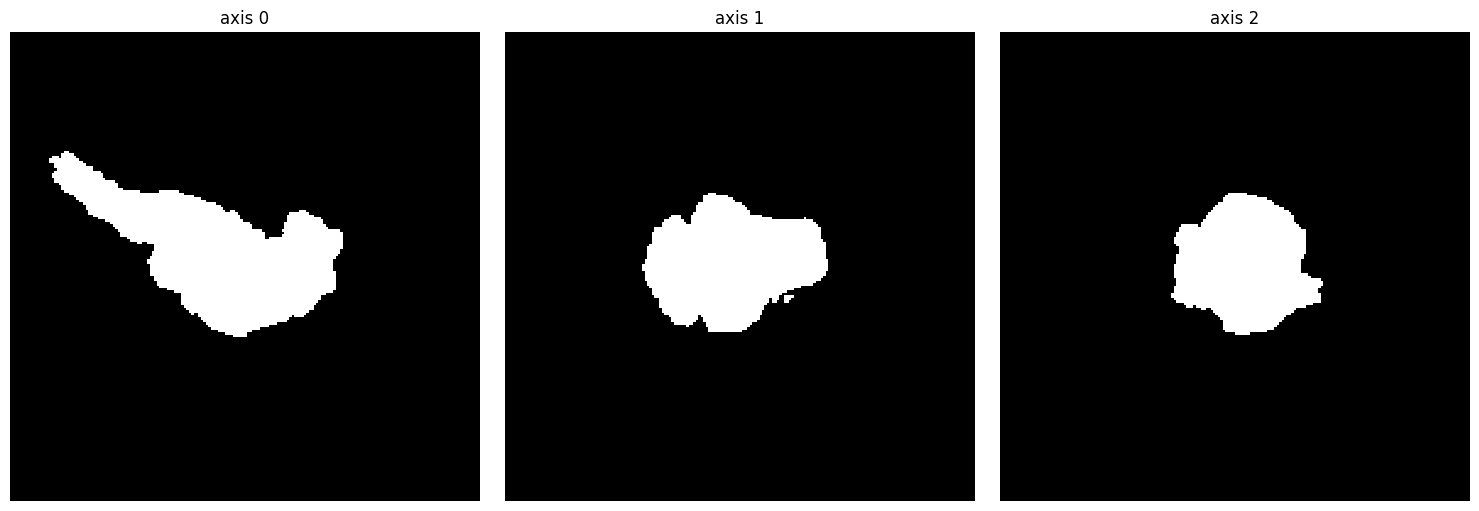

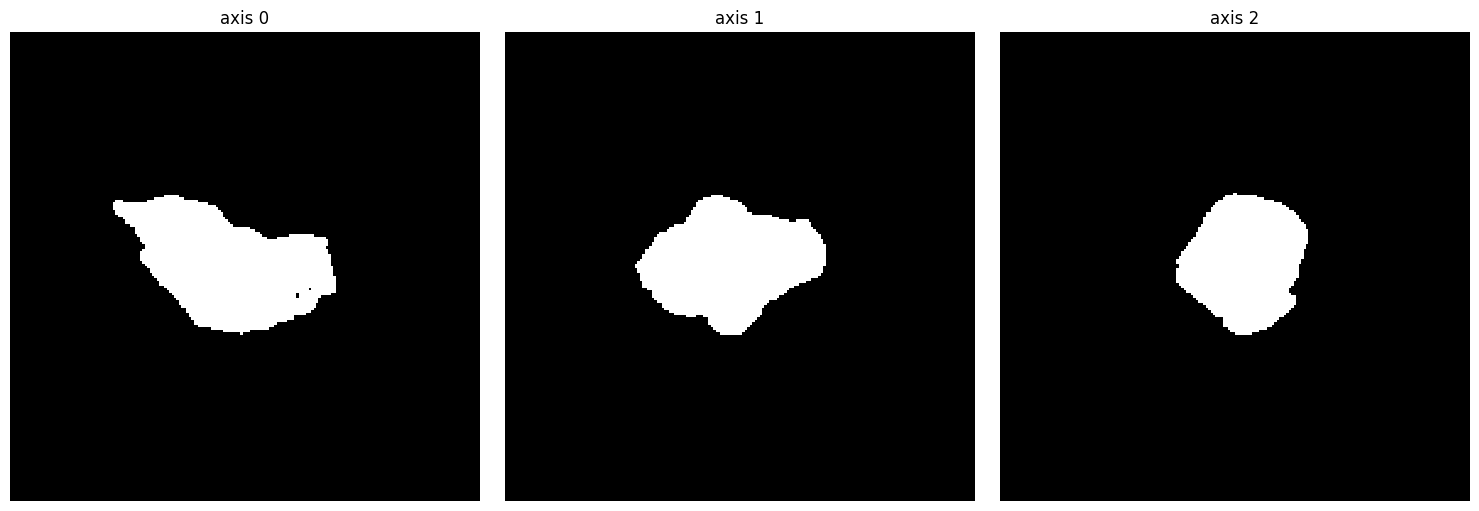

Dice coefficient for JAW-076_1month: 0.8463
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-096_post/JAW-096_post_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
[DEBUG] NiftiArrayIO.load(): no header extensions found!


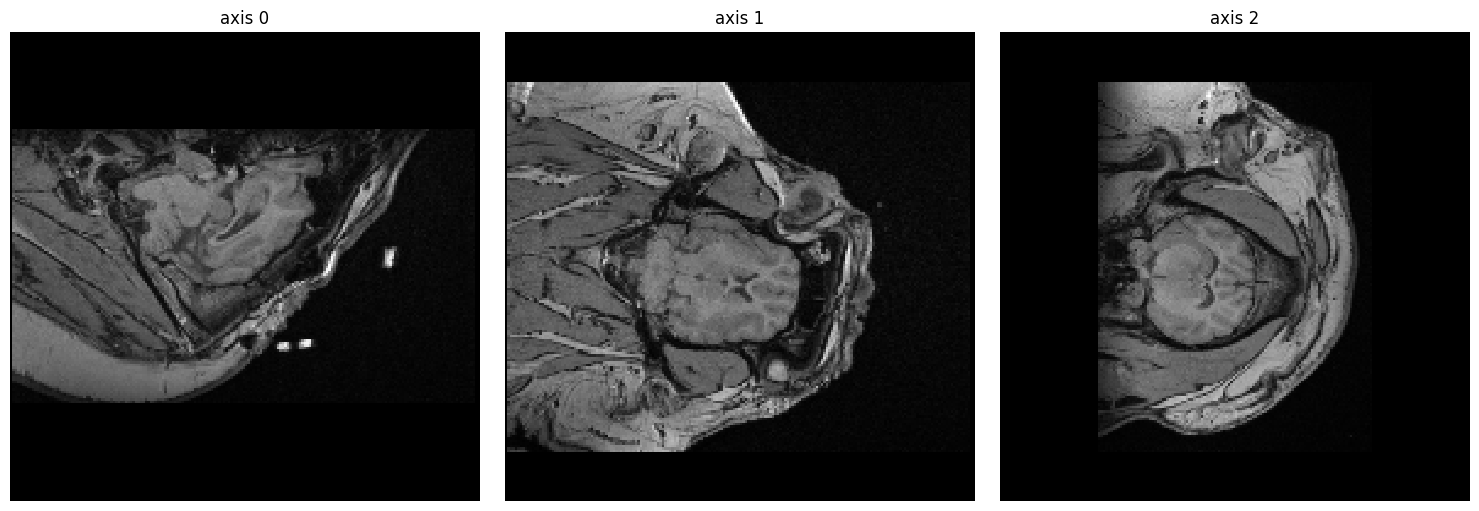

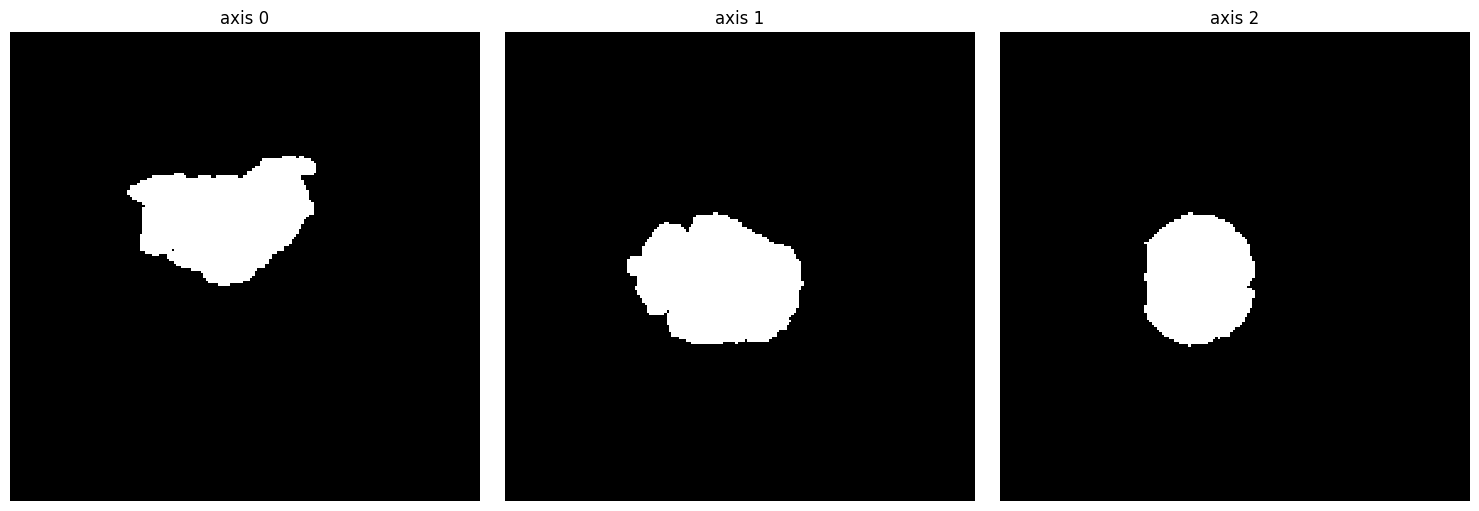

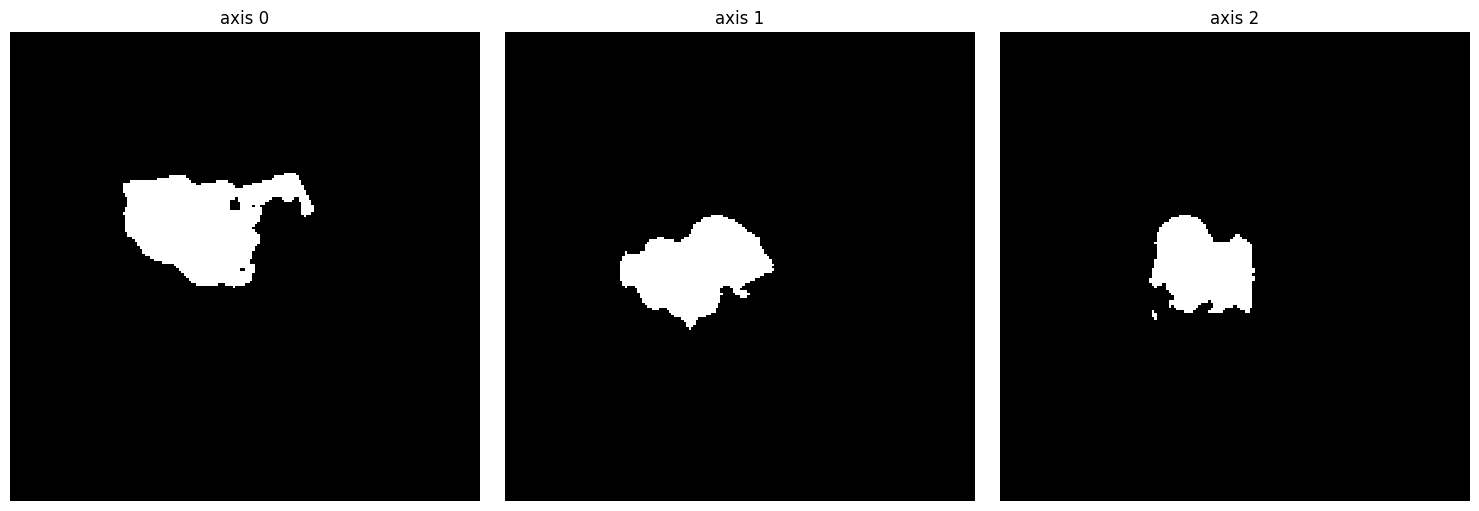

Dice coefficient for JAW-096_post: 0.6823
/cubic/projects/Pig_TBI/JohnWolf/Protocols/T1_mask/JAW-106_1month/JAW-106_1month_T1.nii.gz
[DEBUG] NiftiArrayIO.load(): no header extensions found!
Overall Dice coefficient: 0.7731


In [4]:
import os
import numpy as np
import surfa as sf
import neurite as ne
from scipy import ndimage
from sklearn.metrics import jaccard_score

# Store Dice coefficients
dice_scores = []

new_voxsize = [1, 1, 1]

for folder in subfolders:
    folder_path = os.path.join(validation_folder_path, folder)
    folder_name = os.path.basename(folder_path)
        
    filename = os.path.join(folder_path, f"{folder_name}_T1.nii.gz")
    mask_filename = os.path.join(folder_path, f"{folder_name}_T1_mask.nii.gz")

    if "JAW-106_6month" in filename:
        print("NO MASK FOUND")
        continue
        
    print(filename)
    
    # Load mask
    if not os.path.isfile(mask_filename):
        mask = sf.Volume(np.ones((192, 192, 192)))
    else:
        mask = sf.load_volume(mask_filename).resize(new_voxsize, method="linear")
        mask = mask.resize(new_voxsize).reshape([192, 192, 192, 1])

    # Skip if no input file
    if not os.path.isfile(filename):
        continue
        
    # Load and process image
    image = sf.load_volume(filename)
    crop_img = image.resize(new_voxsize, method="linear").reshape([192, 192, 192, 1])

    # Binarize the mask
    mask.data[mask.data != 0] = 1
    


    # Compute mask center
    ms = np.mean(np.column_stack(np.nonzero(mask)), axis=0).astype(int)
    
    # Plot input image and mask
    ne.plot.volume3D(crop_img, slice_nos=ms)
    ne.plot.volume3D(mask, slice_nos=ms)

    # Predict segmentation
    prediction_one_hot = combined_model.predict(crop_img[None, ...], verbose=0)
    prediction = np.argmax(prediction_one_hot, axis=-1)[0]

    # Extract the largest connected component
    labeled, num_components = ndimage.label(prediction > 0)
    largest_mask = labeled == np.argmax(ndimage.sum(prediction > 0, labeled, range(num_components + 1)))
    largest_mask = ndi.binary_fill_holes(largest_mask)

    ne.plot.volume3D(largest_mask, slice_nos=ms)

    # Compute Dice coefficient
    mask_flat = mask.data.flatten()
    prediction_flat = largest_mask.flatten()
    dice_score = 2 * np.sum(mask_flat * prediction_flat) / (np.sum(mask_flat) + np.sum(prediction_flat))
    if np.sum(mask.data)<1000:
        continue
    dice_scores.append(dice_score)

    print(f"Dice coefficient for {folder_name}: {dice_score:.4f}")
    # break

# Overall Dice coefficient and visualization
overall_dice = np.mean(dice_scores)
print(f"Overall Dice coefficient: {overall_dice:.4f}")




In [6]:
overall_dice

0.33212203610709956

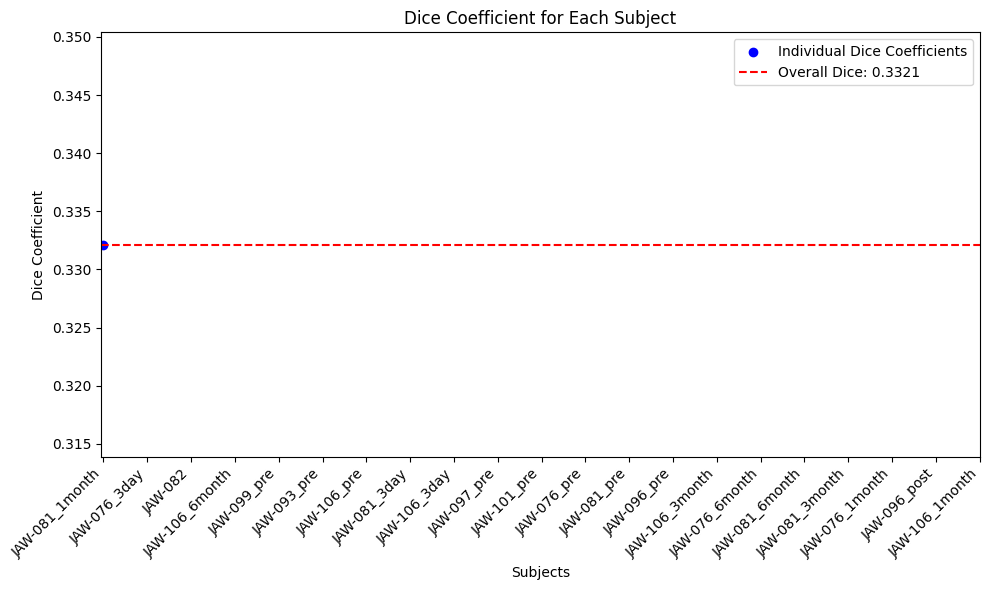

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(dice_scores)), dice_scores, color='blue', label='Individual Dice Coefficients')
plt.axhline(overall_dice, color='red', linestyle='--', label=f'Overall Dice: {overall_dice:.4f}')
plt.xlabel('Subjects')
plt.ylabel('Dice Coefficient')
plt.title('Dice Coefficient for Each Subject')
plt.legend()
plt.xticks(range(len(subfolders)), subfolders, rotation=45, ha='right')
plt.tight_layout()
plt.show()
